## Predict Talent Migration with Machine Learning - 01 Exploratory Analysis 

---

<p style="text-align: center;">
Project split into 5 Notebooks:</br>
</br>
Predict Talent Migration with Machine Learning - 01 Exploratory Analysis</br>
*</br>
Predict Talent Migration with Machine Learning - 02 Modeling</br>
*</br>
Predict Talent Migration with Machine Learning - 03 Grid Build</br>
*</br>
Predict Talent Migration with Machine Learning - 04 Final Take Model A</br>
*</br>
Predict Talent Migration with Machine Learning - 05 Final Take Model B</br> </p> 
         
---

This project aims to create a machine learning model that allows the prediction of employees departure from an Organization. </br>
We will focus our forecast on the Organization's best employees (Top Performers), although a comparison between employees in general will be made. Top Performers will be identified through the creation of a condition, which will be based on the classification of employees evaluation cycles. An analysis on model performance will also be presented, concerning the model's ability to predict the employees departure by **Generation** and **Gender.**

Employees are evaluated on a semiannual basis and our data concerns the last 3 evaluation cycles, between January 1st 2018 to September 31st 2019.

Ratings per evaluation are: </br>

  - Mid Year 2018 (MY2018): **0,1,2,3,4,5** </br>
  - Year End 2018 (YE2018): **0,1,2,3,4,5** </br>
  - Mid Year 2019: **0,1,2,3***.</br>
             
**Data from the Organization shows a change of ratings scale was purpousely made to decrease results granularity.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data import and first impressions:

In [2]:
df = pd.read_excel('DB_Projeto.xlsx', na_values = ['na', 'NaN'])

In [3]:
df.shape

(5684, 44)

In [4]:
pd.set_option("max_columns", None)

**Our dataset is vast and complex, as expected given the Organization actual dimension, which is good from an analysis point of view.</br> It has many variables related with employees demographic information, job positions, if it is a returning employee or not, departments, management structure and locations, pay increase information, performance evaluations results, employees engagement results and different offices locations.**</br>

**All of which will have it's weight when deciding to leave or stay any given Organization.** 

In [5]:
df.head()

,Is Rehire,Age,Generation,Cost Center Hierarchy,Gender,Number of Payroll Dependents,Management Level,Supervisory Organization Employee Count,Supervisory Organization Count of Hire Events,Supervisory Organization Count of Termination Events,Tenure,Last Base Pay Increase - Percent,Is People Manager (with prompts),Boomerang Leave (2-8 Weeks),Boomerang Time Out (2 weeks),Paternity or Maternity Leaves,Work from Home Days Booked,Contract Type,TF - Worker on the same location as Manager,Manager Tenure,Manager's Management Level,Manager's Boomerang Time Out (2 weeks),Manager's Paternity or Maternity Leaves,Manager's Work from Home Days Booked,Mid Year Review 2018,Year End Review 2018,Mid Year Review 2019,AR_Last_Humu_Happiness,AR_Last_Humu_Intention to Stay,AR_Last_Humu_% of responses,DR_Last_Humu_Happiness,DR_Last_Humu_Intention to Stay,DR_Last_Humu_% of responses,TimeJobProfile,TimeinPosition,LocationModif,LocationCountry,NationalityModified,2ndNationality,MgnrLocationAdjuted,MngrLocationCountry,Out,ManagerTimeJobProfile,ManagerTimeJobPosition
0,No,37,Generation Y / Millennials (1981 -1996),Technology,Male,1,Lead,7,7,1,166,0.1750,Yes,No,Yes,No,0.0,Permanent,Yes,17,Head,No,No,0.0,3.0,3.0,3.0,89.0,85.0,0.82,NaN,NaN,NaN,35.496667,36.891667,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,18.215000,19.611000
1,No,43,Generation X (1965 -1980),Technology,Male,1,Head,6,8,0,144,0.2143,Yes,Yes,No,No,0.0,Permanent,Yes,83,VP,No,No,0.0,NaN,NaN,3.0,96.0,40.0,1.00,NaN,NaN,NaN,11.146667,36.891667,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,35.496667,36.891667
2,No,40,Generation X (1965 -1980),Operations,Male,0,Manager,6,1,0,144,0.1589,No,Yes,No,No,0.0,Permanent,No,15,VP,No,No,0.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,147.100000,148.496000,Porto - Boavista,Portugal,Portugal,0,London,UK,0,15.852333,17.248333
3,No,38,Generation Y / Millennials (1981 -1996),Content,Male,1,Individual Contributor,8,1,3,140,0.0303,No,No,Yes,No,0.0,Permanent,Yes,32,Supervisor,No,No,0.5,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,144.438333,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,0,15.204333,16.600333
4,No,37,Generation Y / Millennials (1981 -1996),Operations,Female,2,Individual Contributor,11,3,0,140,0.0260,No,No,No,No,37.0,Permanent,No,27,Manager,No,No,1.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,30.804667,Porto - Boavista,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,7.836000,9.232000


**Given the dataset size, a search for duplicate entry was necessary. Upon mutual consideration it was decided to maintain observations that at the outset could be considered duplicates, taking into account the fact that the employees may, in fact, have the same work status and have the same demographic data, and no existing variable can verifiably distinguish observations.**

In [6]:
df[df.duplicated()]

,Is Rehire,Age,Generation,Cost Center Hierarchy,Gender,Number of Payroll Dependents,Management Level,Supervisory Organization Employee Count,Supervisory Organization Count of Hire Events,Supervisory Organization Count of Termination Events,Tenure,Last Base Pay Increase - Percent,Is People Manager (with prompts),Boomerang Leave (2-8 Weeks),Boomerang Time Out (2 weeks),Paternity or Maternity Leaves,Work from Home Days Booked,Contract Type,TF - Worker on the same location as Manager,Manager Tenure,Manager's Management Level,Manager's Boomerang Time Out (2 weeks),Manager's Paternity or Maternity Leaves,Manager's Work from Home Days Booked,Mid Year Review 2018,Year End Review 2018,Mid Year Review 2019,AR_Last_Humu_Happiness,AR_Last_Humu_Intention to Stay,AR_Last_Humu_% of responses,DR_Last_Humu_Happiness,DR_Last_Humu_Intention to Stay,DR_Last_Humu_% of responses,TimeJobProfile,TimeinPosition,LocationModif,LocationCountry,NationalityModified,2ndNationality,MgnrLocationAdjuted,MngrLocationCountry,Out,ManagerTimeJobProfile,ManagerTimeJobPosition
1228,No,23,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,6,9,8,3,-1.0000,No,No,No,No,0.0,Intern,Yes,8,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877333,3.877333,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,33.815333
1519,Yes,24,Generation Y / Millennials (1981 -1996),Operations,Male,0,Individual Contributor,8,5,3,18,0.2609,No,No,No,No,0.0,Permanent,Yes,17,Head,No,No,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,20.177667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,0,10.132000,19.163000
1592,No,28,Generation Y / Millennials (1981 -1996),Digital Production,Male,0,Individual Contributor,21,17,16,2,0.0000,No,No,No,No,0.0,Uncertain Term,Yes,45,Lead,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.629333,2.629333,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,15.585667
4064,No,48,Generation X (1965 -1980),Operations,Female,0,Individual Contributor,12,31,11,10,0.0000,No,No,No,No,0.0,Fixed Term,Yes,73,Supervisor,No,No,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,12.441667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,0,10.132000,39.935667
4310,No,22,Generation Z (1997 and onwards),Digital Production,Female,0,Individual Contributor,11,5,1,8,0.0000,No,No,No,No,0.0,Uncertain Term,Yes,34,Lead,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,10.513333,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,0,10.132000,14.471000
5089,No,25,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,15,0,0,3,0.0000,No,No,No,No,0.0,Fixed Term,Yes,43,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.914667,5.406667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,0,10.132000,4.325333
5092,No,25,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,15,0,0,3,0.0000,No,No,No,No,0.0,Fixed Term,Yes,43,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.914667,5.406667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,0,10.132000,4.325333
5137,No,25,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,15,2,1,3,0.0000,No,No,No,No,0.0,Fixed Term,Yes,33,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,4.958667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,0,10.132000,4.825333
5141,No,22,Generation Z (1997 and onwards),Operations,Female,0,Individual Contributor,16,22,7,3,0.0000,No,No,No,No,0.0,Permanent,Yes,43,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,5.406667,Moscow,Russia,Russian Federation,0,Moscow,Russia,0,10.132000,2.862667
5142,No,27,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,15,12,9,3,0.0000,No,No,No,No,0.0,Fixed Term,Yes,21,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,4.492000,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,0,10.132000,23.33

In [7]:
df.reset_index(inplace= True)

In [8]:
df.shape

(5684, 45)

In [9]:
df.head()

,index,Is Rehire,Age,Generation,Cost Center Hierarchy,Gender,Number of Payroll Dependents,Management Level,Supervisory Organization Employee Count,Supervisory Organization Count of Hire Events,Supervisory Organization Count of Termination Events,Tenure,Last Base Pay Increase - Percent,Is People Manager (with prompts),Boomerang Leave (2-8 Weeks),Boomerang Time Out (2 weeks),Paternity or Maternity Leaves,Work from Home Days Booked,Contract Type,TF - Worker on the same location as Manager,Manager Tenure,Manager's Management Level,Manager's Boomerang Time Out (2 weeks),Manager's Paternity or Maternity Leaves,Manager's Work from Home Days Booked,Mid Year Review 2018,Year End Review 2018,Mid Year Review 2019,AR_Last_Humu_Happiness,AR_Last_Humu_Intention to Stay,AR_Last_Humu_% of responses,DR_Last_Humu_Happiness,DR_Last_Humu_Intention to Stay,DR_Last_Humu_% of responses,TimeJobProfile,TimeinPosition,LocationModif,LocationCountry,NationalityModified,2ndNationality,MgnrLocationAdjuted,MngrLocationCountry,Out,ManagerTimeJobProfile,ManagerTimeJobPosition
0,0,No,37,Generation Y / Millennials (1981 -1996),Technology,Male,1,Lead,7,7,1,166,0.1750,Yes,No,Yes,No,0.0,Permanent,Yes,17,Head,No,No,0.0,3.0,3.0,3.0,89.0,85.0,0.82,NaN,NaN,NaN,35.496667,36.891667,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,18.215000,19.611000
1,1,No,43,Generation X (1965 -1980),Technology,Male,1,Head,6,8,0,144,0.2143,Yes,Yes,No,No,0.0,Permanent,Yes,83,VP,No,No,0.0,NaN,NaN,3.0,96.0,40.0,1.00,NaN,NaN,NaN,11.146667,36.891667,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,35.496667,36.891667
2,2,No,40,Generation X (1965 -1980),Operations,Male,0,Manager,6,1,0,144,0.1589,No,Yes,No,No,0.0,Permanent,No,15,VP,No,No,0.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,147.100000,148.496000,Porto - Boavista,Portugal,Portugal,0,London,UK,0,15.852333,17.248333
3,3,No,38,Generation Y / Millennials (1981 -1996),Content,Male,1,Individual Contributor,8,1,3,140,0.0303,No,No,Yes,No,0.0,Permanent,Yes,32,Supervisor,No,No,0.5,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,144.438333,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,0,15.204333,16.600333
4,4,No,37,Generation Y / Millennials (1981 -1996),Operations,Female,2,Individual Contributor,11,3,0,140,0.0260,No,No,No,No,37.0,Permanent,No,27,Manager,No,No,1.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,30.804667,Porto - Boavista,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,7.836000,9.232000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   index                                                 5684 non-null   int64  
 1   Is Rehire                                             5684 non-null   object 
 2   Age                                                   5684 non-null   int64  
 3   Generation                                            5684 non-null   object 
 4   Cost Center Hierarchy                                 5684 non-null   object 
 5   Gender                                                5684 non-null   object 
 6   Number of Payroll Dependents                          5684 non-null   int64  
 7   Management Level                                      5684 non-null   object 
 8   Supervisory Organization Employee Count               5684

In [11]:
df.isnull().sum()

index                                                      0
Is Rehire                                                  0
Age                                                        0
Generation                                                 0
Cost Center Hierarchy                                      0
Gender                                                     0
Number of Payroll Dependents                               0
Management Level                                           0
Supervisory Organization Employee Count                    0
Supervisory Organization Count of Hire Events              0
Supervisory Organization Count of Termination Events       0
Tenure                                                     0
Last Base Pay Increase - Percent                           0
Is People Manager (with prompts)                           0
Boomerang Leave (2-8 Weeks)                                0
Boomerang Time Out (2 weeks)                               0
Paternity or Maternity L

In [12]:
df.describe()

,index,Age,Number of Payroll Dependents,Supervisory Organization Employee Count,Supervisory Organization Count of Hire Events,Supervisory Organization Count of Termination Events,Tenure,Last Base Pay Increase - Percent,Work from Home Days Booked,Manager Tenure,Manager's Work from Home Days Booked,Mid Year Review 2018,Year End Review 2018,Mid Year Review 2019,AR_Last_Humu_Happiness,AR_Last_Humu_Intention to Stay,AR_Last_Humu_% of responses,DR_Last_Humu_Happiness,DR_Last_Humu_Intention to Stay,DR_Last_Humu_% of responses,TimeJobProfile,TimeinPosition,2ndNationality,Out,ManagerTimeJobProfile,ManagerTimeJobPosition
count,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,1594.000000,2147.000000,2256.00000,564.000000,564.000000,564.000000,180.000000,180.000000,180.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000
mean,2841.500000,31.348698,0.170303,7.353976,6.477305,3.599754,20.233286,0.118921,1.971499,33.794511,1.877815,3.111669,3.267816,2.66578,82.457447,63.070922,0.911968,85.977778,68.255556,0.921722,10.032724,17.829898,0.013547,0.271112,10.230533,26.944675
std,1640.973796,14.880821,0.521093,5.919006,8.231625,5.135477,19.860815,0.863727,6.743189,25.867351,7.037435,0.751697,0.851238,0.55556,13.477959,18.901782,0.106260,11.305783,18.419422,0.102754,12.079044,15.875559,0.115610,0.444573,5.207415,19.858695
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.000000,0.000000,1.000000,0.000000,1.00000,23.000000,4.000000,0.320000,57.000000,17.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.166667,1.181333
25%,1420.750000,27.000000,0.000000,4.000000,1.000000,0.000000,5.000000,0.000000,0.000000,15.000000,0.000000,3.000000,3.000000,2.00000,76.000000,53.000000,0.850000,80.000000,60.000000,0.860000,2.014667,6.121333,0.000000,0.000000,10.132000,15.685667
50%,2841.500000,30.000000,0.000000,6.000000,4.000000,2.000000,15.000000,0.000000,0.000000,27.000000,0.000000,3.000000,3.000000,3.00000,85.000000,65.000000,0.940000,88.000000,71.500000,1.000000,5.523333,14.471000,0.000000,0.000000,10.132000,23.703000
75%,4262.250000,35.000000,0.000000,10.000000,9.000000,4.000000,28.000000,0.100000,0.500000,47.000000,1.000000,4.000000,4.000000,3.00000,92.000000,76.000000,1.000000,94.000000,81.000000,1.000000,13.589667,24.336333,0.000000,1.000000,10.132000,31.819333
max,5683.000000,1033.000000,6.000000,46.000000,48.000000,28.000000,166.000000,11.000000,166.000000,166.000000,166.000000,5.000000,5.000000,3.00000,100.000000,100.000000,1.000000,100.000000,100.000000,1.000000,147.100000,148.496000,1.000000,1.000000,146.086333,148.496000


---

**Right from the start, we can see that the dataset has a total number of 1541 employees who left the Organization, with Out = 1 (Target variable):**

In [13]:
df[df['Out'] == 1]

,index,Is Rehire,Age,Generation,Cost Center Hierarchy,Gender,Number of Payroll Dependents,Management Level,Supervisory Organization Employee Count,Supervisory Organization Count of Hire Events,Supervisory Organization Count of Termination Events,Tenure,Last Base Pay Increase - Percent,Is People Manager (with prompts),Boomerang Leave (2-8 Weeks),Boomerang Time Out (2 weeks),Paternity or Maternity Leaves,Work from Home Days Booked,Contract Type,TF - Worker on the same location as Manager,Manager Tenure,Manager's Management Level,Manager's Boomerang Time Out (2 weeks),Manager's Paternity or Maternity Leaves,Manager's Work from Home Days Booked,Mid Year Review 2018,Year End Review 2018,Mid Year Review 2019,AR_Last_Humu_Happiness,AR_Last_Humu_Intention to Stay,AR_Last_Humu_% of responses,DR_Last_Humu_Happiness,DR_Last_Humu_Intention to Stay,DR_Last_Humu_% of responses,TimeJobProfile,TimeinPosition,LocationModif,LocationCountry,NationalityModified,2ndNationality,MgnrLocationAdjuted,MngrLocationCountry,Out,ManagerTimeJobProfile,ManagerTimeJobPosition
23,23,No,36,Generation Y / Millennials (1981 -1996),Finance,Female,1,Lead,2,1,1,102,0.0000,Yes,No,No,No,0.0,Permanent,Yes,63,Manager,No,No,12.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.003000,24.003000,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,1,5.740000,36.891667
32,32,No,40,Generation X (1965 -1980),Digital Production,Male,0,Individual Contributor,9,9,2,86,0.0000,No,No,No,No,0.0,Permanent,No,23,Head,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.487667,87.487667,Guimarães,Portugal,NaN,0,Los Angeles - Arts,USA,1,24.336333,45.009000
42,42,No,36,Generation Y / Millennials (1981 -1996),Technology,Female,1,Head,5,12,2,96,0.1316,No,No,No,No,0.0,Permanent,Yes,44,SVP,No,No,0.0,3.0,3.0,NaN,90.0,64.0,0.66,89.0,67.0,0.76,25.964667,25.964667,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,1,7.702667,36.891667
46,46,No,37,Generation Y / Millennials (1981 -1996),Finance,Male,0,Individual Contributor,5,4,3,96,0.0000,No,No,No,No,0.0,Permanent,Yes,97,Individual Contributor,No,No,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.448667,34.448667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,1,0.966667,36.891667
52,52,No,35,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,24,11,10,72,0.0000,No,No,No,No,0.0,Permanent,Yes,24,Lead,No,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.716667,73.716667,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,24.750000,49.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,5547,No,27,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,10,8,5,1,0.0000,No,No,No,No,0.0,Fixed Term,Yes,17,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.314667,1.314667,Shanghai - One Museum,China,China,0,Shanghai - One Museum,China,1,1.881333,19.163000
5596,5596,No,27,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,7,11,4,0,0.0000,No,No,No,No,0.0,Uncertain Term,Yes,88,Lead,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,1,0.900000,23.703000
5606,5606,No,25,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,3,10,8,0,0.0000,No,No,No,No,0.0,Fixed Term,Yes,25,Director,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066667,0.066667,Beijing - TechTemple,China,China,0,Beijing - TechTemple,China,1,25.964667,28.508667
5611,5611,No,23,Generation Y / Millennials (1981 -1996),Private Client,Male,0,Individual Contributor,10,4,6,0,0.0000,No,No,No,No,0.0,Not available,Yes,3,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,São Paulo - Santos Augusta,Brazil,Brazil,0,São Paulo - Santos Augusta,Brazil,1,0.566667,6.454667


---

**To improve the reading and writing of the code, we are going to simplify our variables names**

**Rename the columns:**

In [14]:
df.rename(columns={
'index' : 'Id',    
'Is Rehire' : 'Rehire',
'Cost Center Hierarchy' : 'CostCenterH',
'Number of Payroll Dependents' : 'Dependents',
'Management Level' : 'ManagementLevel',
'Supervisory Organization Employee Count' : 'EmployeeCount',
'Supervisory Organization Count of Hire Events' : 'HireCount',
'Supervisory Organization Count of Termination Events' : 'TerminationCount',
'Last Base Pay Increase - Percent' : 'PayIncrease',
'Is People Manager (with prompts)' : 'PeopleManager',
'Boomerang Leave (2-8 Weeks)' : 'BLeave',
'Boomerang Time Out (2 weeks)' : 'BTimeOut',
'Paternity or Maternity Leaves' : 'ParentLeave',
'Work from Home Days Booked' : 'HomeOffice',
'Contract type' : 'ContractType',
'TF - Worker on the same location as Manager' : 'MProximity',
'Manager Tenure' : 'MTenure',
"Manager's Management Level" : 'MManagementLevel',
"Manager's Boomerang Time Out (2 weeks)" : 'MBoomerang',
"Manager's Paternity or Maternity Leaves": 'MParentLeave',
"Manager's Work from Home Days Booked" : 'MHomeoffice',
'Mid Year Review 2018' : 'MY2018',
'Year End Review 2018' : 'YE2018',
'Mid Year Review 2019' : 'MY2019',
'AR_Last_Humu_Happiness' : 'ARHappiness',
'AR_Last_Humu_Intention to Stay' : 'ARStay',
'AR_Last_Humu_% of responses' : 'ARResponses',
'DR_Last_Humu_Happiness' : 'DRHappiness',
'DR_Last_Humu_Intention to Stay' : 'DRStay',
'DR_Last_Humu_% of responses' : 'DRResponses',
'LocationModif' : 'OfficeLocation',
'LocationCountry' : 'Country',
'NationalityModified' : 'ModNationality',
'2ndNationality' : '2ndNationality',
'MgnrLocationAdjuted' : 'MOfficeLocation',
'MngrLocationCountry' : 'MCountry',
'ManagerTimeJobProfile' : 'MTimeJobProfile',
'ManagerTimeJobPosition' : 'MTimeinPosition'}, inplace = True)

---

**Age:**

**To start off our knowledge of the data we are working on, we will take a look at Age variable, and see if everything is ok.**</br>
**It seeems we have out of the ordinary Age values. When filtering between reasonable employees age, with 0, 118 and even 1033 years old employees (Talk about work experience!). We will be dealing with these outliers next.**

---

In [15]:
df[(df['Age'] < 18) | (df['Age']>= 66)]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition
2031,2031,No,118,Not Available,Operations,Female,0,Individual Contributor,10,16,6,22,0.0000,No,No,No,No,0.0,Not available,Yes,13,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.188333,23.188333,Tokyo,Japan,NaN,0,Tokyo,Japan,1,10.132,37.906333
2032,2032,No,118,Not Available,Marketing,Female,0,Individual Contributor,5,5,5,20,0.0000,No,No,No,No,0.0,Not available,Yes,28,Director,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.992333,20.992333,Tokyo,Japan,NaN,0,Tokyo,Japan,1,10.132,31.519333
2064,2064,No,118,Not Available,Private Client,Female,0,Individual Contributor,5,10,7,5,-0.6375,No,No,No,No,0.0,Not available,Yes,16,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040000,6.040000,Tokyo,Japan,NaN,0,Tokyo,Japan,1,10.132,2.329333
2070,2070,No,118,Not Available,Private Client,Male,0,Individual Contributor,7,10,7,2,-0.3000,No,No,No,No,0.0,Not available,Yes,19,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.462667,2.462667,Tokyo,Japan,Others,0,Tokyo,Japan,1,10.132,2.329333
2223,2223,No,17,Generation Z (1997 and onwards),Strategic Commission,Male,0,Individual Contributor,9,11,3,0,-0.4000,No,No,No,No,0.0,Not available,Yes,14,Director,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966667,0.966667,London,UK,NaN,0,London,UK,1,10.132,26.364667
2335,2335,No,0,Not Available,Product,Not Available,0,Not Available,6,0,0,0,0.0000,No,No,No,No,0.0,Not available,Yes,34,Head,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.471000,14.471000,London,UK,NaN,0,London,UK,0,10.132,48.586333
4141,4141,No,0,Not Available,Commercial,Not Available,0,Manager,1,1,1,9,0.0000,No,No,No,No,0.0,Fixed Term,No,8,VP,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.432000,9.432000,Beijing - TechTemple,China,NaN,0,NaN,NaN,1,10.132,19.096333
4145,4145,No,0,Not Available,Digital Production,Not Available,0,Individual Contributor,8,3,4,9,0.0909,No,No,No,No,0.0,Fixed Term,Yes,2,Director,No,No,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.562667,9.632000,Beijing - TechTemple,China,NaN,0,Beijing - TechTemple,China,1,10.132,12.094667
4146,4146,No,0,Not Available,Digital Production,Not Available,0,Individual Contributor,9,11,8,11,0.2097,No,No,No,No,0.0,Fixed Term,Yes,4,Director,No,No,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.694667,11.694667,Beijing - TechTemple,China,NaN,0,Beijing - TechTemple,China,1,10.132,12.094667
4149,4149,No,0,Not Available,Digital Production,Not Available,0,Individual Contributor,1,2,1,10,0.1429,No,No,No,No,0.0,Fixed Term,Yes,19,Director,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.913333,10.913333,Beijing - TechTemple,China,NaN,0,Beijing - TechTemple,China,1,10.132,28.508667


## 1st Transformation

**Transformation of out of the ordinary "Age" observation as Null values, to allow for future imputation strategy in the modeling phase.
It is not the only option but it was decided as the most appropriate.**

In [16]:
df.loc[df['Age'].isin([118.0, 0.0, 1033.0]), 'Age'] = np.nan

In [17]:
df['Age'].isnull().sum()

14

---

**Generation:**

**Now that Age variable is sorted, we can analyse its relation with Generation and have a better grasp at our data.**

---

In [18]:
df['Generation'].unique()

array(['Generation Y / Millennials (1981 -1996)',
       'Generation X (1965 -1980)', 'Baby Boomers (1946 -1964)',
       'Generation Z (1997 and onwards)', 'Not Available'], dtype=object)

In [19]:
df[["Generation", "Age"]].groupby(["Generation"])["Age"].count()

Generation
Baby Boomers (1946 -1964)                    13
Generation X (1965 -1980)                   698
Generation Y / Millennials (1981 -1996)    4773
Generation Z (1997 and onwards)             186
Not Available                                 0
Name: Age, dtype: int64

In [20]:
df.groupby(['Generation', 'Age']).size().reset_index().groupby(['Generation', 'Age'])[[0]].max()

0
Generation                              Age      
Baby Boomers (1946 -1964)               55.0    3
                                        56.0    3
                                        57.0    4
                                        59.0    1
                                        64.0    2
Generation X (1965 -1980)               37.0    7
                                        38.0   33
                                        39.0  142
                                        40.0  103
                                        41.0   89
                                        42.0   61
                                        43.0   48
                                        44.0   47
                                        45.0   34
                                        46.0   22
                                        47.0   28
                                        48.0   23
                                        49.0   16
                                        50.0   12
                                        51.0   11
                                        52.0   11
                                        53.0    4
                                        54.0    7
Generation Y / Millennials (1981 -1996) 21.0    8
                                        22.0   40
                                        23.0  197
                                        24.0  252
                                        25.0  323
                                        26.0  343
                                        27.0  410
                                        28.0  387
                                        29.0  408
                                        30.0  383
                                        31.0  341
                                        32.0  337
                                        33.0  295
                                        34.0  255
                                        35.0  233
                                        36.0  237
                                        37.0  183
                                        38.0  141
Generation Z (1997 and onwards)         17.0    1
                                        18.0    5
                                        19.0   14
                                        20.0   28
                                        21.0   43
                                        22.0   95

In [21]:
p_generation = df.groupby(['Generation', 'Out'])['Age'].count().rename('Count').reset_index()
p_generation.sort_values(by = 'Out')

,Generation,Out,Count
0,Baby Boomers (1946 -1964),0,7
2,Generation X (1965 -1980),0,510
4,Generation Y / Millennials (1981 -1996),0,3500
6,Generation Z (1997 and onwards),0,124
8,Not Available,0,0
1,Baby Boomers (1946 -1964),1,6
3,Generation X (1965 -1980),1,188
5,Generation Y / Millennials (1981 -1996),1,1273
7,Generation Z (1997 and onwards),1,62
9,Not Available,1,0


In [22]:
p_generation['Percentage'] = (p_generation['Count'] / p_generation.groupby('Generation')['Count'].transform("sum") * 100).round()
p_generation.sort_values(by = 'Out')

,Generation,Out,Count,Percentage
0,Baby Boomers (1946 -1964),0,7,54.0
2,Generation X (1965 -1980),0,510,73.0
4,Generation Y / Millennials (1981 -1996),0,3500,73.0
6,Generation Z (1997 and onwards),0,124,67.0
8,Not Available,0,0,NaN
1,Baby Boomers (1946 -1964),1,6,46.0
3,Generation X (1965 -1980),1,188,27.0
5,Generation Y / Millennials (1981 -1996),1,1273,27.0
7,Generation Z (1997 and onwards),1,62,33.0
9,Not Available,1,0,NaN


---

**Gender:**

**By analizing the Gender variabel, we can see both genders representation with regards to employees leaving the Organization.**

---

In [23]:
p_gender_out = df.groupby(['Gender', 'Out'])['Age'].count().rename('Count').reset_index()
p_gender_out['Percentage'] = p_gender_out['Count'] / p_gender_out.groupby('Gender')['Count'].transform("sum")
p_gender_out

,Gender,Out,Count,Percentage
0,Female,0,2101,0.712203
1,Female,1,849,0.287797
2,Male,0,2040,0.750000
3,Male,1,680,0.250000
4,Not Available,0,0,NaN
5,Not Available,1,0,NaN


---

**CostCenterH:**

**CostCenterH variable contains information regarding Organization departments and when compared with "Out" target variable we can see from which department more employees have exit the Organization.**

---

In [24]:
cost_center = df.groupby(['CostCenterH'])['Out'].value_counts(normalize = True).rename('Count').reset_index()

cost_center['Percentage'] = (cost_center['Count'] * 100).round()

cost_center.head()

,CostCenterH,Out,Count,Percentage
0,Commercial,0,0.728033,73.0
1,Commercial,1,0.271967,27.0
2,Content,0,0.834081,83.0
3,Content,1,0.165919,17.0
4,Creative Services,0,0.833333,83.0


In [25]:
cost_center_out = cost_center[(cost_center['Out'] == 1.0)]

cost_center_out.head()

,CostCenterH,Out,Count,Percentage
1,Commercial,1,0.271967,27.0
3,Content,1,0.165919,17.0
5,Creative Services,1,0.166667,17.0
7,Digital Production,1,0.341912,34.0
9,Finance,1,0.216867,22.0


---

**Office Location:**

**Knowing from which office location are employees leaving the most, can help the Organization analyze probable causes and define plans and actions.**

---

In [26]:
office_out = df.groupby(['OfficeLocation'])['Out'].value_counts(normalize = True).rename('Count').reset_index()
office_out['Count'] = (office_out['Count'] * 100).round()
office_out.head()

,OfficeLocation,Out,Count
0,Beijing - TechTemple,0,57.0
1,Beijing - TechTemple,1,43.0
2,Braga,0,96.0
3,Braga,1,4.0
4,Dubai,0,92.0


---

## 2nd Transformation

**Set "Top Performer" condition:**

**For analysis purposes, it was taken into account the two most recent performance evaluation cycles (Year-end 2018, Mid-year 2019).**

**We also wanted to understand if it would be advantageous to define as TopPerfomer an employee with >= 4 in YE2018 * OR * == 3 in MY2019**

**Therefore:**

- Rule 1 - TopPerformer: >= 4 in YE2018 * & * == 3 in MY2019

- Rule 2 - TopPerformer: >= 4 in YE2018 * OU * == 3 in MY2019

Results presented in units and percentages, for the two rules scenarios:

---

Rule 1:

In [27]:
df['TopPerformer'] = (df["YE2018"] >= 4) & (df['MY2019'] == 3)

In [28]:
df['TopPerformer'].replace({False: 0, True: 1}, inplace = True)

In [29]:
df['TopPerformer'].value_counts()

0    5143
1     541
Name: TopPerformer, dtype: int64

In [30]:
df['TopPerformer'].value_counts(normalize=True).mul(100)

0    90.482055
1     9.517945
Name: TopPerformer, dtype: float64

---

Rule 2

In [31]:
top_2 = (df["YE2018"] >= 4) | (df['MY2019'] == 3)

In [32]:
top_2.value_counts()

False    3802
True     1882
dtype: int64

In [33]:
top_2.value_counts(normalize=True).mul(100)

False    66.889514
True     33.110486
dtype: float64

---

**Analyzing both results, conclusion was that although in Rule 2 we achieve greater representation of TopPerformers, the 9% of Rule 1 is sufficient for modeling purposes and we were able to strengthen the real notion of TopPerformer**

**Therefore, to be a Top Performer an employee you must have performance evaluation results of >= 4 in YE2018 * & * == 3 in MY2019.**

---

TopPerformers vs target variable "Out":

In [34]:
top_out = df[(df['TopPerformer'] == 1) & (df['Out'] == 1)]
top_out.head()

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer
509,509,No,31.0,Generation Y / Millennials (1981 -1996),Product,Male,1,Individual Contributor,4,4,1,37,0.1273,No,No,No,No,0.0,Permanent,Yes,50,Head,No,No,2.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,7.769333,26.031333,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,1,10.132,23.703000,1
864,864,No,29.0,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,17,30,22,28,0.1616,No,No,No,No,0.0,Fixed Term,Yes,10,Supervisor,No,No,0.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,12.641667,12.641667,Lisbon - D. Luís,Portugal,Others,0,Lisbon - D. Luís,Portugal,1,10.132,12.128000,1
905,905,No,26.0,Generation Y / Millennials (1981 -1996),Commercial,Female,0,Individual Contributor,4,2,2,27,0.1000,No,No,No,No,2.0,Permanent,Yes,41,Manager,No,No,20.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,28.094000,28.094000,Porto - Boavista,Portugal,Italy,0,Porto - Boavista,Portugal,1,10.132,23.703000,1
1191,1191,No,34.0,Generation Y / Millennials (1981 -1996),Technology,Male,2,Manager,4,2,5,25,0.1765,No,No,No,Yes,4.0,Permanent,Yes,53,Head,No,No,12.5,5.0,5.0,3.0,56.0,26.0,0.63,NaN,NaN,NaN,2.129333,19.377667,Porto - Lionesa,Portugal,Brazil,0,Porto - Lionesa,Portugal,1,10.132,29.790000,1
1343,1343,No,25.0,Generation Y / Millennials (1981 -1996),Technology,Female,0,Individual Contributor,5,0,2,24,0.1429,No,No,No,No,0.0,Permanent,Yes,58,Lead,No,No,3.5,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,24.416667,24.416667,Porto - Boavista,Portugal,Portugal,0,Porto - Boavista,Portugal,1,10.132,30.804667,1


---

**Analysis of the Performance Evaluation variables:**

In [37]:
df[["MY2018","YE2018", "MY2019"]].nunique()

MY2018    5
YE2018    6
MY2019    3
dtype: int64

**We find that the variable YE2018 has 6 possible values out of only 5 desired ones.**

In [38]:
df['YE2018'].value_counts() 

3.0    983
4.0    689
2.0    300
5.0    135
1.0     36
0.0      4
Name: YE2018, dtype: int64

**The correction was made according to the variable dictionary provided. The 0.0 values of the variable 'YE2018' were passed to Nulls:**

In [39]:
df.loc[df['YE2018'] == 0.0, 'YE2018'] = np.nan

---

**Exploring the relationship between different variables with the "TopPerformer" + "Out" variables:**

- Generations Y and X have the highest percentage of TopPerformers, being slightly ahead of Generation BabyBoomers.
- Generation Z presents low percentages of TopPerformers.

In [40]:
p_top_generation = df.groupby(['Generation'])['TopPerformer'].value_counts(normalize = True).rename('Percentage').reset_index()

p_top_generation['Percentage'] = (p_top_generation['Percentage'] * 100).round(2)

p_top_generation[p_top_generation['TopPerformer'] == 1].sort_values(by = 'Percentage')

,Generation,TopPerformer,Percentage
7,Generation Z (1997 and onwards),1,0.54
1,Baby Boomers (1946 -1964),1,7.69
3,Generation X (1965 -1980),1,9.31
5,Generation Y / Millennials (1981 -1996),1,9.93


**One of the main reasons why Generation Z has less TopPerformers may have to do with the need to be in the company for at least 1 year, to complete 2 evaluation cycles.**
**Grouping the Generations by average Tenure, we realize that Generation Z has only 6 months, on average, of the relationship of employees with the Organization.**

In [41]:
df.groupby(['Generation'])['Tenure'].mean().rename('Avg Tenure').round(2).reset_index()

,Generation,Avg Tenure
0,Baby Boomers (1946 -1964),18.31
1,Generation X (1965 -1980),26.91
2,Generation Y / Millennials (1981 -1996),19.83
3,Generation Z (1997 and onwards),6.39
4,Not Available,11.36


---

**Dependents:**

**Employees with Dependents by Gender.**

In [42]:
p_depen_gend = df.groupby(["Dependents"])['Gender'].value_counts(normalize = True).rename('Percentage').reset_index()

p_depen_gend['Percentage'] = (p_depen_gend['Percentage'] * 100).round(2)

p_depen_gend

,Dependents,Gender,Percentage
0,0,Female,54.31
1,0,Male,45.51
2,0,Not Available,0.18
3,1,Male,62.40
4,1,Female,37.60
5,2,Male,70.56
6,2,Female,29.44
7,3,Male,73.91
8,3,Female,26.09
9,4,Male,100.00


---

- Employees with dependents + TopPerformers + relationship with target variable "Out".

In [1]:
p_depen_top = df.groupby(["TopPerformer", "Out"])['Dependents'].value_counts(normalize = True).rename('Percentage').reset_index()

p_depen_top['Percentage'] = (p_depen_top['Percentage'] * 100).round(2) 

p_depen_top

# To see only those who left:

#p_depen_top[p_depen_top['Out'] == 1]

NameError: name 'df' is not defined

---

#### Inconsistencies identified + abnormal values (Variables with "Not Available", "Other" or "Others" values):

These inconsistencies were identified for the purposes of analysis, however, no changes were made by mutual decision, as they do not represent a "threat" to the subsequent modeling process, and with the intention of preserving the nature of the data as much as possible.

In [88]:
#df[(df['ManagementLevel'] != 'Individual Contributor') & (df['MManagementLevel'] == 'Individual Contributor')] # 17 observations

In [44]:
#df[df['Gender'] == 'Not Available'] # 9 observations

#df.loc[df['Gender'] == 'Not Available', 'Gender'] = np.nan

In [45]:
#df[df['Generation'] == 'Not Available'] # 14 observations

#df.loc[df['Generation'] == 'Not Available', 'Generation'] = np.nan

In [46]:
#df[df['ManagementLevel'] == 'Not Available'] # 1 observations

#df.loc[df['ManagementLevel'] == 'Not Available', 'ManagementLevel'] = np.nan

In [47]:
#df[df['Contract Type'] == 'Not available'] # 355 observations

#df.loc[df['Contract Type'] == 'Not available', 'Contract Type'] = np.nan

In [48]:
#df[df['MManagementLevel'] == 'Not Available'] # 2 observations

#df.loc[df['MManagementLevel'] == 'Not Available', 'MManagementLevel'] = np.nan

In [49]:
#df[df['OfficeLocation'] == 'Other'] # 19 observations

#df.loc[df['OfficeLocation'] == 'Other', 'OfficeLocation'] = np.nan

In [50]:
#df[df['Country'] == 'Other'] # 19 observations

#df.loc[df['Country'] == 'Other', 'Country'] = np.nan

In [51]:
#df[df['ModNationality'] == 'Others'] # 346 observations

#df.loc[df['ModNationality'] == 'Others', 'ModNationality'] = np.nan

In [52]:
#df[df['MOfficeLocation'] == 'Other'] # 10 observations

#df.loc[df['MOfficeLocation'] == 'Other', 'MOfficeLocation'] = np.nan

In [53]:
#df[df['MCountry'] == 'Other'] # 10 observations

#df.loc[df['MCountry'] == 'Other', 'MCountry'] = np.nan

---

Years since the founding of the Organization + relationship with "Tenure"

In [56]:
2020-2007

13

In [57]:
166/12 # 166 is the number of months since the founding of the Organization until now (February 2021)

13.833333333333334

In [58]:
df['Tenure'].unique()

array([166, 144, 140, 138, 137, 131, 130, 127, 112, 117, 115, 114, 113,
       102, 110, 108, 107,  86, 103,  97, 101,  96,  99,  98,  95,  72,
        94,  93,  92,  90,  89,  66,  88,  87,  85,  84,  83,  82,  81,
        80,  79,  78,  77,  58,  76,  75,  69,  56,  57,  74,  60,  73,
         7,  71,  70,  68,  50,  67,  46,  65,  64,  42,  49,  59,  63,
        62,  45,  61,  41,  39,  15,  40,  37,  44,  35,  14,  48,  34,
        55,  54,  32,  51,  36,  53,  52,  47,  43,  38,  28,  29,  27,
        31,  20,   3,  23,  24,  33,  19,  26,  22,  10,  25,  18,  16,
        17,  21,  13,   9,  30,  12,  11,   2,   8,   6,   0,   4,   5,
         1, 116, 141, 109, 143])

---

**Tenure vs Time in Position - Inconsistencies: ** Tenure must be equal to or greater than Time in Position**

In [59]:
df[(df['Tenure'] == 0) & (df['TimeinPosition'] != 0)]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer
921,921,No,36.0,Generation Y / Millennials (1981 -1996),Technology,Male,2,Individual Contributor,1,1,1,0,0.0541,No,No,No,No,0.0,Permanent,Yes,16,Individual Contributor,No,No,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.416667,1.000000,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,1,10.132000,25.698000,0
958,958,Yes,24.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,16,13,0,0.2324,No,No,No,No,0.0,Uncertain Term,Yes,22,Individual Contributor,No,No,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.325333,1.214667,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,1,10.132000,39.054333,0
1008,1008,No,26.0,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,15,45,19,0,0.1579,No,No,No,No,0.0,Fixed Term,Yes,84,Supervisor,No,No,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.529667,1.214667,Porto - Lionesa,Portugal,Portugal,1,Porto - Lionesa,Portugal,1,10.132000,98.748000,0
1015,1015,No,25.0,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,8,5,3,0,0.3077,No,No,No,No,0.0,Permanent,Yes,6,Head,No,No,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.062667,1.214667,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,1,10.132000,19.163000,0
1062,1062,Yes,33.0,Generation Y / Millennials (1981 -1996),Digital Production,Male,0,Individual Contributor,19,27,28,0,0.0000,No,No,No,No,0.0,Uncertain Term,Yes,28,Lead,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966667,0.966667,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,35.978000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679,5679,No,25.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,1,1,0,0,0.0000,No,No,No,No,1.0,Fixed Term,Yes,17,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,1.614667,Shanghai - One Museum,China,China,0,Shanghai - One Museum,China,0,10.132000,19.029667,0
5680,5680,No,28.0,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,10,8,5,0,0.0000,No,No,No,No,0.0,Fixed Term,Yes,17,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033333,1.448000,Shanghai - One Museum,China,China,0,Shanghai - One Museum,China,0,2.014667,19.163000,0
5681,5681,No,31.0,Generation Y / Millennials (1981 -1996),Global People Team,Female,0,Individual Contributor,6,6,4,0,0.0000,No,No,No,No,0.0,Fixed Term,Yes,22,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366667,1.781333,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,0,22.888333,24.303000,0
5682,5682,No,26.0,Generation Y / Millennials (1981 -1996),Content,Female,0,Individual Contributor,1,4,2,0,0.0000,No,No,No,No,10.0,Fixed Term,Yes,26,Director,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233333,1.648000,Beijing - TechTemple,China,China,0,Beijing - TechTemple,China,0,27.112667,28.508667,0


---

**TimeJobProfile and TimeinPosition - 0 values are error:**

In [60]:
df[(df["TimeJobProfile"] == 0) | (df["TimeinPosition"] == 0)]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer
1022,1022,Yes,22.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,28,32,23,0,0.0,No,No,No,No,0.0,Uncertain Term,Yes,14,Lead,No,No,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,16.600333,0
3658,3658,No,27.0,Generation Y / Millennials (1981 -1996),Finance,Female,0,Lead,4,7,6,0,0.0,Yes,No,No,No,0.0,Not available,Yes,0,Director,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,São Paulo - Santos Augusta,Brazil,Brazil,0,São Paulo - Santos Augusta,Brazil,1,10.132000,15.885667,0
3819,3819,No,25.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,11,18,16,0,0.0,No,No,No,No,0.0,Seasonal,Yes,69,Individual Contributor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,1,10.132000,5.106667,0
3841,3841,No,32.0,Generation Y / Millennials (1981 -1996),Operations,Male,2,Individual Contributor,16,45,19,0,0.0,No,No,No,No,0.0,Uncertain Term,Yes,83,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Porto,Portugal,Others,0,Porto,Portugal,1,10.132000,98.748000,0
4254,4254,No,29.0,Generation Y / Millennials (1981 -1996),Global People Team,Female,0,Individual Contributor,2,1,1,0,0.0,No,No,No,No,0.0,Permanent,No,25,Head,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Dubai,Dubai,Others,0,Moscow,Russia,1,10.132000,23.703000,0
4299,4299,No,25.0,Generation Y / Millennials (1981 -1996),Digital Production,Male,0,Individual Contributor,21,27,28,0,0.0,No,No,No,No,0.0,Uncertain Term,Yes,27,Individual Contributor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,1,10.132000,10.513333,0
4361,4361,No,37.0,Generation Y / Millennials (1981 -1996),Digital Production,Male,0,Individual Contributor,20,27,28,0,0.0,No,No,No,No,0.0,Uncertain Term,Yes,27,Lead,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,1,10.132000,10.513333,0
4420,4420,No,33.0,Generation Y / Millennials (1981 -1996),Technology,Male,0,Lead,4,7,7,0,0.0,Yes,No,No,No,0.0,Permanent,Yes,61,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,São Paulo - Santos Augusta,Brazil,Brazil,0,São Paulo - Santos Augusta,Brazil,1,10.132000,72.236333,0
4673,4673,No,28.0,Generation Y / Millennials (1981 -1996),Product,Female,0,Individual Contributor,3,4,5,0,0.0,No,No,No,No,0.0,Fixed Term,Yes,23,Lead,No,No,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Shanghai - WTT,China,China,0,Shanghai - WTT,China,1,10.132000,32.252667,0
4795,4795,No,22.0,Generation Z (1997 and onwards),Digital Production,Female,0,Individual Contributor,2,5,3,0,0.0,No,No,No,No,0.0,Uncertain Term,Yes,31,Individual Contributor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Guimarães,Portugal,Portugal,0,Guimarães,Portugal,1,10.132000,39.054333,0


---

## 3rd Transformation

In [61]:
df['Contract Type'].unique()

array(['Permanent', 'Fixed Term', 'Uncertain Term', 'Not available',
       'Intern', 'Seasonal', 'Part-Time'], dtype=object)

In [62]:
df[(df['Contract Type'] == 'Seasonal') & (df['Out'] == 0)]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer
2611,2611,Yes,27.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,0,0,19,0.1111,No,No,No,No,0.0,Seasonal,Yes,50,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,21.440333,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,4.725333,0
2674,2674,No,29.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,18,16,35,0.2291,No,No,No,No,0.0,Seasonal,Yes,82,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,20.325667,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,5.106667,0
2701,2701,No,38.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,18,16,51,0.3988,No,No,No,No,0.0,Seasonal,Yes,82,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,22.421667,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,5.106667,0
2773,2773,No,28.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,18,16,22,0.3158,No,No,No,No,0.0,Seasonal,Yes,82,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,23.569667,Los Angeles - Arts,USA,NaN,0,Los Angeles - Arts,USA,0,10.132000,5.106667,0
3154,3154,No,29.0,Generation Y / Millennials (1981 -1996),Digital Production,Male,0,Individual Contributor,9,0,0,20,0.1111,No,No,No,No,0.0,Seasonal,Yes,50,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,21.973667,Los Angeles - Arts,USA,NaN,0,Los Angeles - Arts,USA,0,10.132000,4.725333,0
3651,3651,No,31.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,18,16,16,0.0000,No,No,No,No,0.0,Seasonal,Yes,82,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,17.981667,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,5.106667,0
3859,3859,No,23.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,0,0,12,0.1111,No,No,No,No,0.0,Seasonal,Yes,50,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,14.271000,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,4.725333,0
3964,3964,No,23.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,0,0,11,0.1111,No,No,No,No,0.0,Seasonal,Yes,50,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,13.289667,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,4.725333,0
4005,4005,No,27.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,18,16,11,0.0000,No,No,No,No,0.0,Seasonal,Yes,82,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,13.356333,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,5.106667,0
5019,5019,No,26.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,9,0,0,4,0.0000,No,No,No,No,0.0,Seasonal,Yes,50,Supervisor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,6.321333,Los Angeles - Arts,USA,United States of America,0,Los Angeles - Arts,USA,0,10.132000,4.725333,0


**Seasonals that have already left - it was decided to withdraw these observations, since it does not add relevant information for the modeling phase.**

In [63]:
df[(df['Contract Type'] == 'Seasonal') & (df['Out'] == 1)].index

Int64Index([2705, 2714, 2752, 3165, 3622, 3623, 3636, 3637, 3646, 3650, 3652,
            3655, 3664, 3751, 3818, 3819, 3928, 3929, 4241],
           dtype='int64')

In [64]:
df.drop(df[(df['Contract Type'] == 'Seasonal') & (df['Out'] == 1)].index, inplace = True)

In [65]:
df[(df['Contract Type'] == 'Seasonal') & (df['Out'] == 1)]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer


---

## 4th Transformation

**PayIncrease variabel contains information regarding percentage increase of employees payment over time since joining the Organization. Some values however were identified being negative increases and over 100% increases. While this may be possible on certain higher positions, that was not the case with the found employees, so these observations were dropped.**

In [66]:
df[df['PayIncrease'] < 0]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer
139,139,No,36.0,Generation Y / Millennials (1981 -1996),Global People Team,Female,2,Lead,2,2,2,57,-0.2000,Yes,No,No,No,0.0,Permanent,No,33,Head,No,No,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.680000,58.598667,Porto - Lionesa,Portugal,Portugal,0,Porto - Boavista,Portugal,1,10.132000,23.703000,0
1225,1225,No,23.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,1,0,1,3,-1.0000,No,No,No,No,0.0,Intern,Yes,81,Individual Contributor,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877333,3.877333,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,87.487667,0
1226,1226,No,23.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,1,0,1,3,-1.0000,No,No,No,No,0.0,Intern,Yes,41,Individual Contributor,No,No,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877333,3.877333,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,4.725333,0
1227,1227,No,23.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,6,9,8,3,-1.0000,No,No,No,No,0.0,Intern,Yes,8,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877333,3.877333,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,33.815333,0
1228,1228,No,23.0,Generation Y / Millennials (1981 -1996),Digital Production,Female,0,Individual Contributor,6,9,8,3,-1.0000,No,No,No,No,0.0,Intern,Yes,8,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877333,3.877333,Guimarães,Portugal,NaN,0,Guimarães,Portugal,1,10.132000,33.815333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,5044,No,36.0,Generation Y / Millennials (1981 -1996),Global People Team,Male,0,Head,7,6,0,4,-0.0001,No,No,No,No,0.0,Permanent,Yes,80,Executive,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.425333,5.840000,London,UK,United Kingdom,0,London,UK,0,10.132000,83.563333,0
5211,5211,No,21.0,Generation Z (1997 and onwards),Technology,Male,0,Individual Contributor,6,1,1,3,-0.1429,No,No,No,No,0.0,Intern,Yes,34,Lead,No,No,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310667,4.725333,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,10.132000,23.703000,0
5252,5252,No,23.0,Generation Y / Millennials (1981 -1996),Technology,Male,0,Individual Contributor,3,3,1,3,-0.1429,No,No,No,No,4.0,Intern,Yes,34,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310667,4.725333,Porto - Lionesa,Portugal,Portugal,0,Porto - Lionesa,Portugal,0,34.863333,36.278000,0
5265,5265,No,23.0,Generation Y / Millennials (1981 -1996),Operations,Female,0,Individual Contributor,5,0,0,3,-0.1429,No,No,No,No,0.0,Intern,No,17,Head,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310667,4.725333,Lisbon - D. Luís,Portugal,Portugal,0,Porto - Boavista,Portugal,0,9.117333,19.163000,0


In [67]:
df.loc[df['PayIncrease'] < 0, 'PayIncrease'] = np.nan

In [68]:
df.drop(df[df['PayIncrease'] > 2].index, inplace = True)

In [69]:
df[df['PayIncrease'] > 1]

,Id,Rehire,Age,Generation,CostCenterH,Gender,Dependents,ManagementLevel,EmployeeCount,HireCount,TerminationCount,Tenure,PayIncrease,PeopleManager,BLeave,BTimeOut,ParentLeave,HomeOffice,Contract Type,MProximity,MTenure,MManagementLevel,MBoomerang,MParentLeave,MHomeoffice,MY2018,YE2018,MY2019,ARHappiness,ARStay,ARResponses,DRHappiness,DRStay,DRResponses,TimeJobProfile,TimeinPosition,OfficeLocation,Country,ModNationality,2ndNationality,MOfficeLocation,MCountry,Out,MTimeJobProfile,MTimeinPosition,TopPerformer
2067,2067,Yes,21.0,Generation Z (1997 and onwards),Private Client,Male,0,Individual Contributor,11,10,7,8,1.8944,No,No,No,No,0.0,Permanent,Yes,3,Manager,No,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.014667,4.425333,Tokyo,Japan,Japan,0,Tokyo,Japan,0,10.132,5.44,0


<AxesSubplot:ylabel='Frequency'>

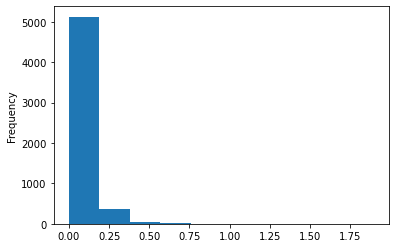

In [70]:
df['PayIncrease'].plot(kind='hist')

### Isolate the group of Top Performers and observe the distribution of all variables with the target Out variable**

In [71]:
df_ = df[df['TopPerformer'] == 1]

---

In [72]:
joint = df.loc[:, df.columns.difference(['Id','OfficeLocation', 'MOfficeLocation', 'Country', 'MCountry', 'ModNationality'], sort = False)]

/Users/ElsaSilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


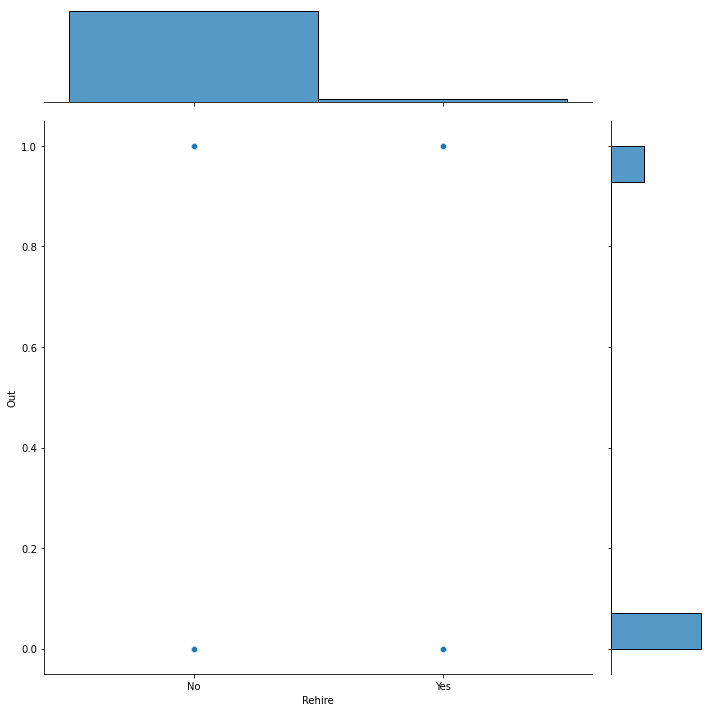

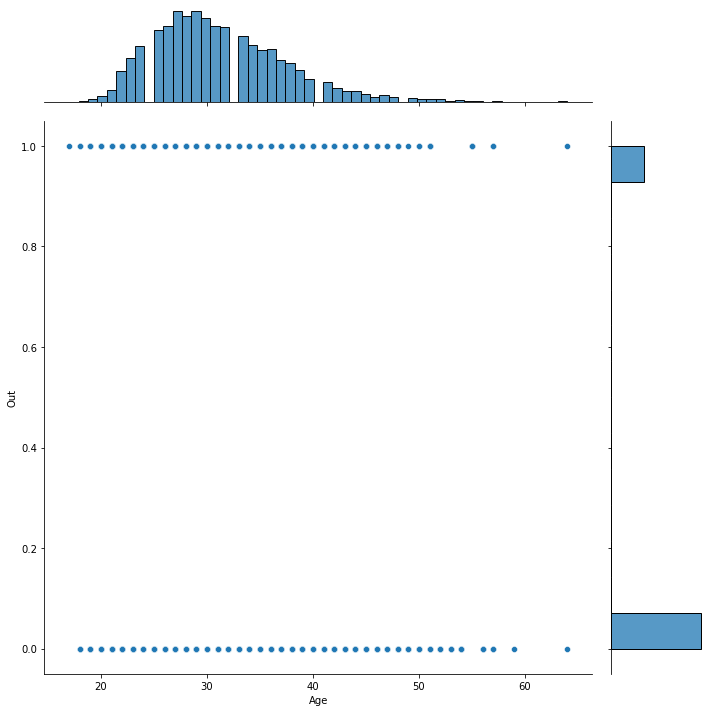

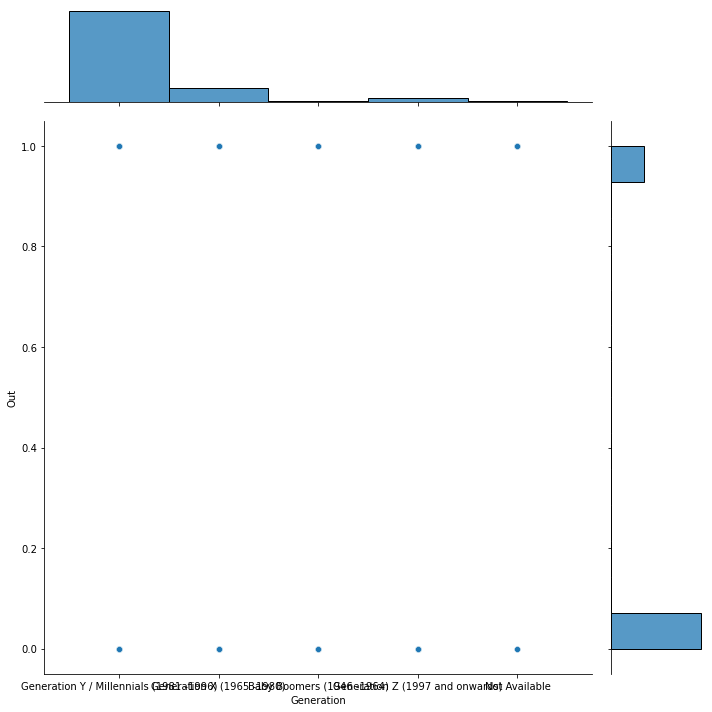

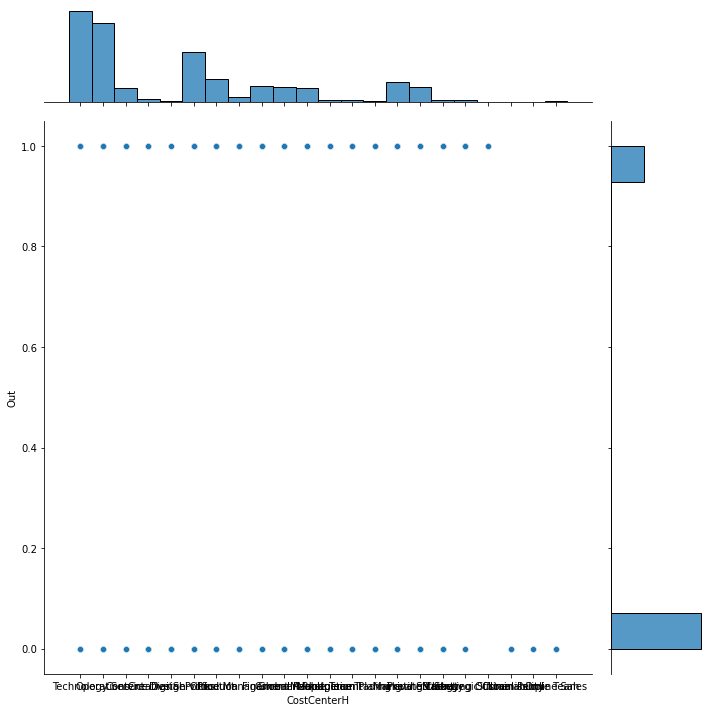

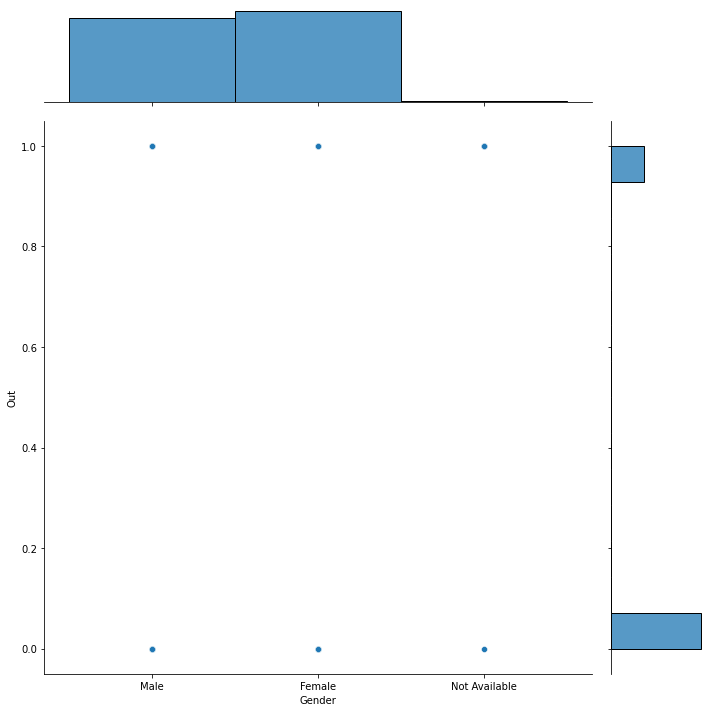

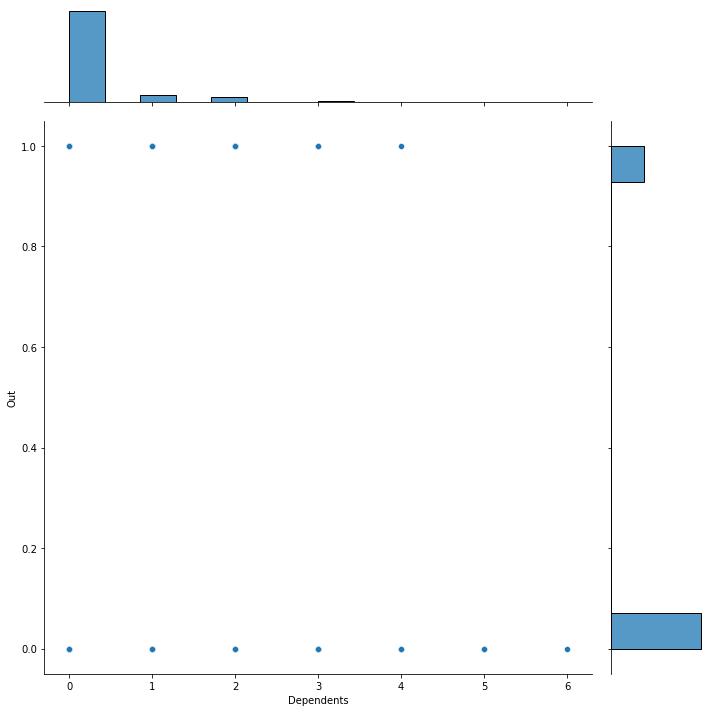

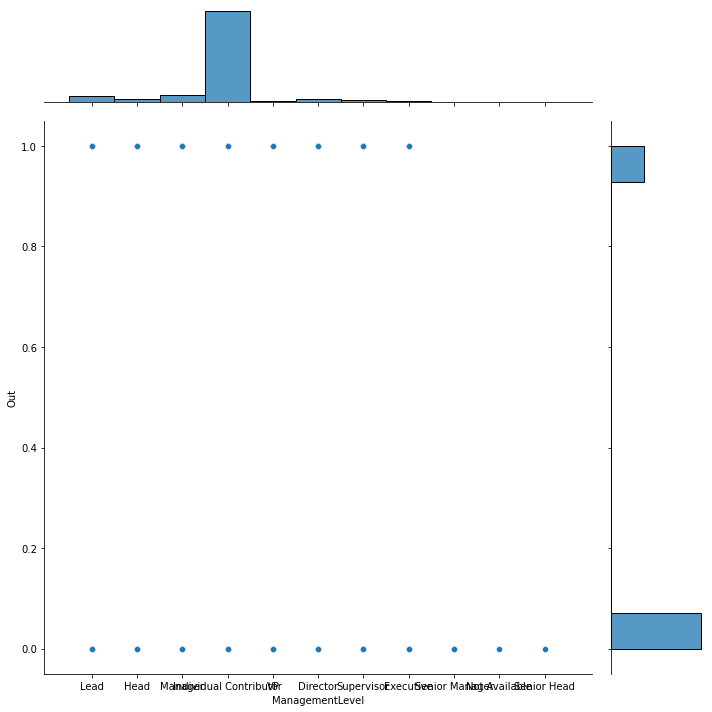

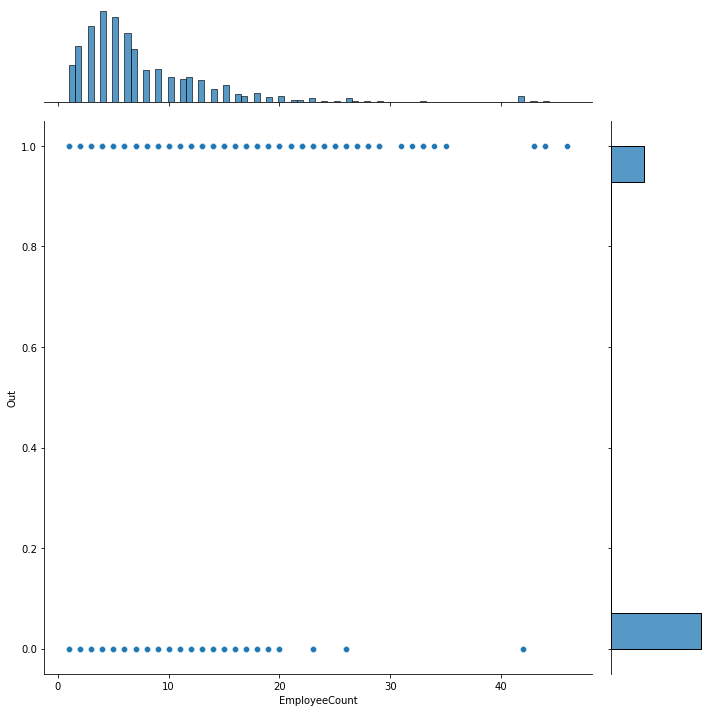

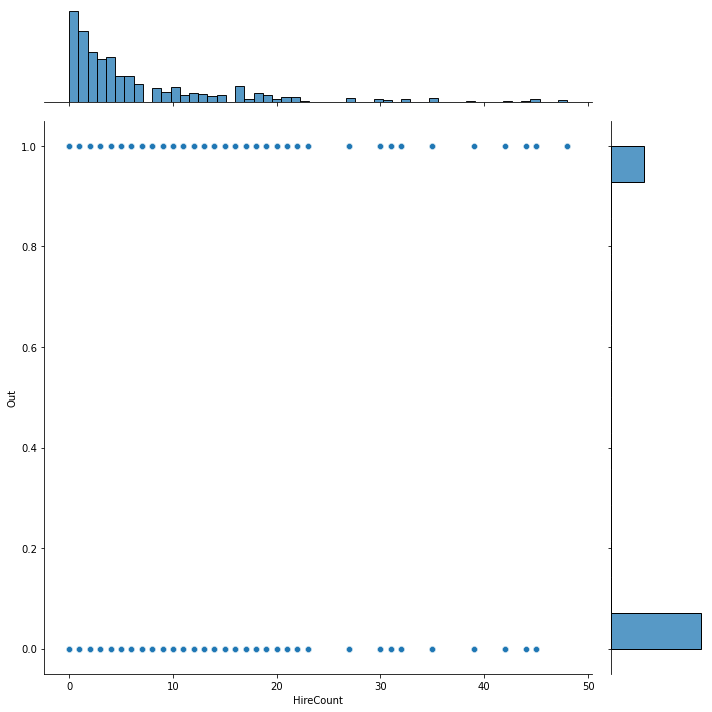

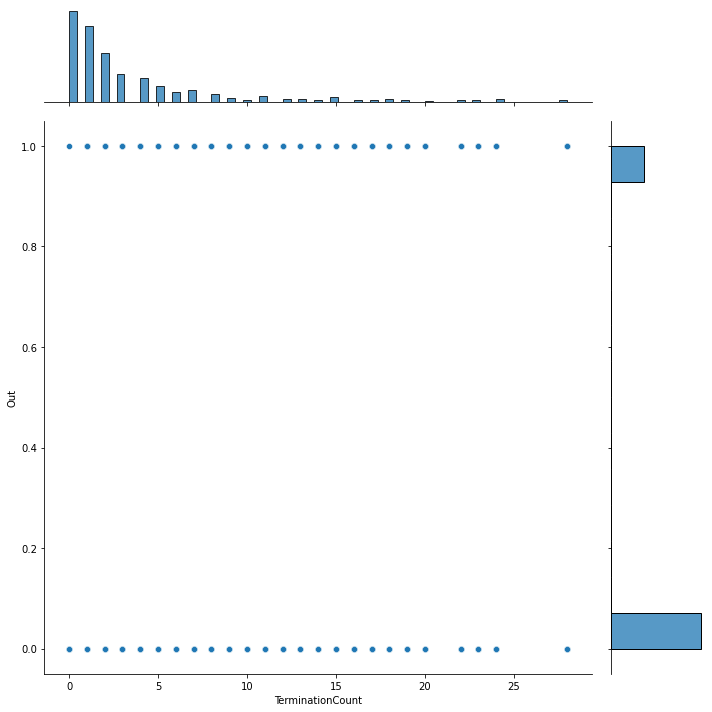

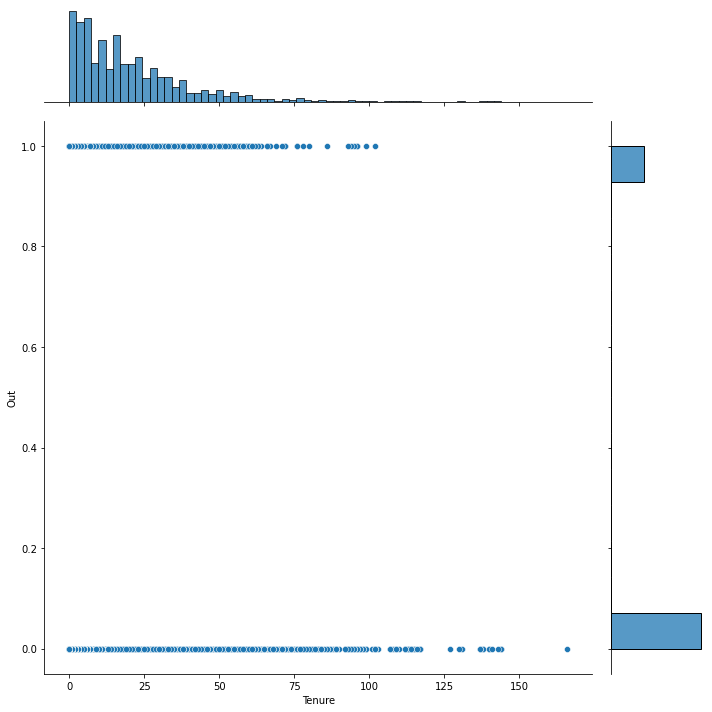

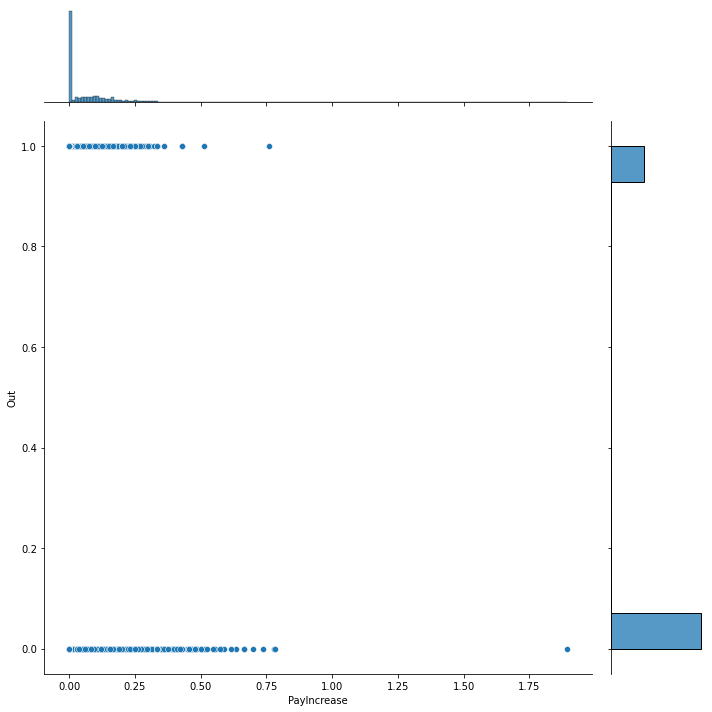

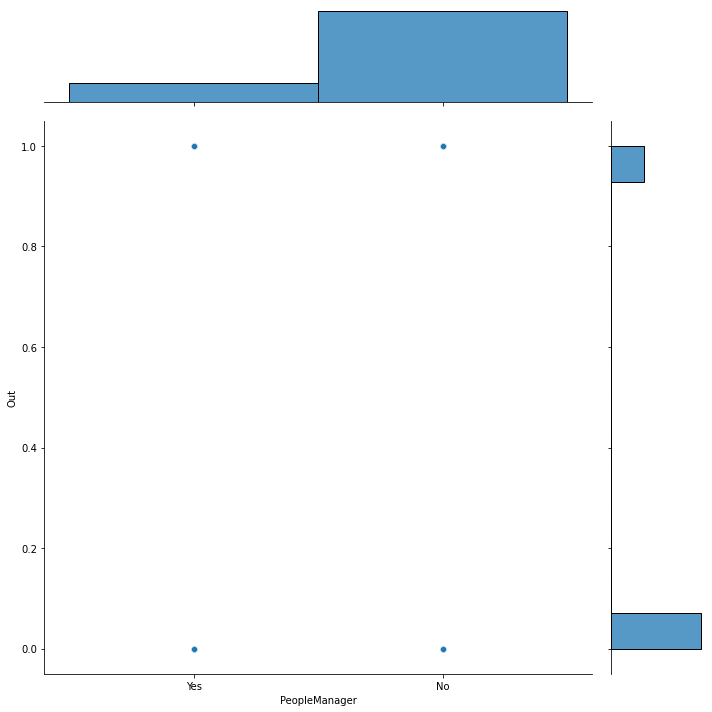

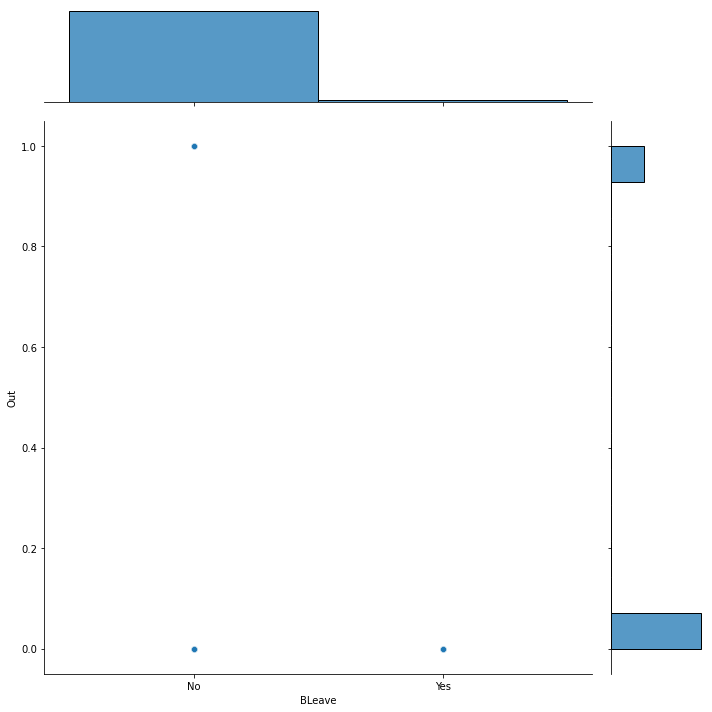

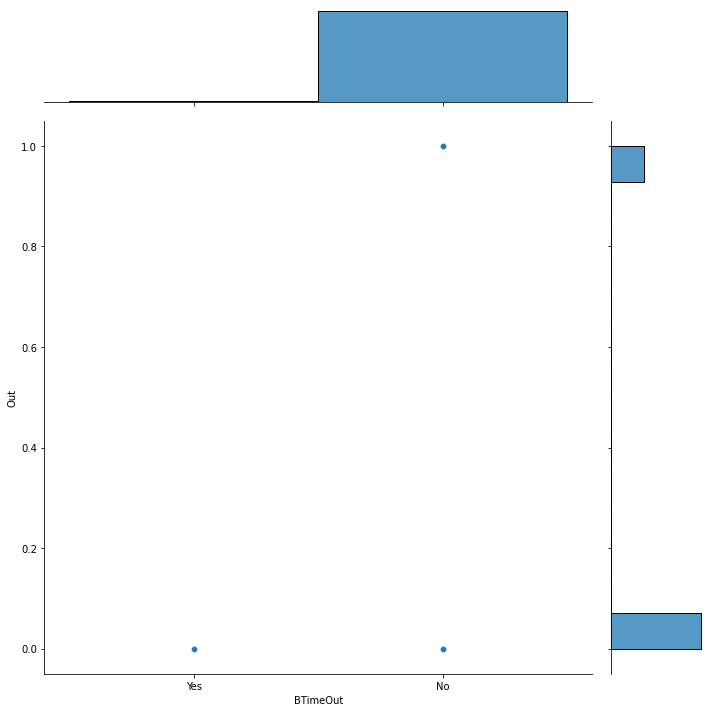

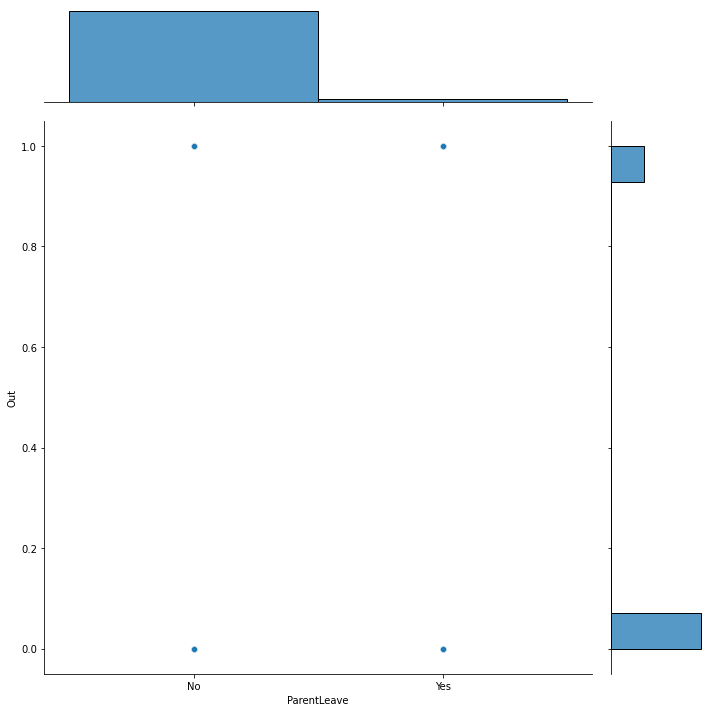

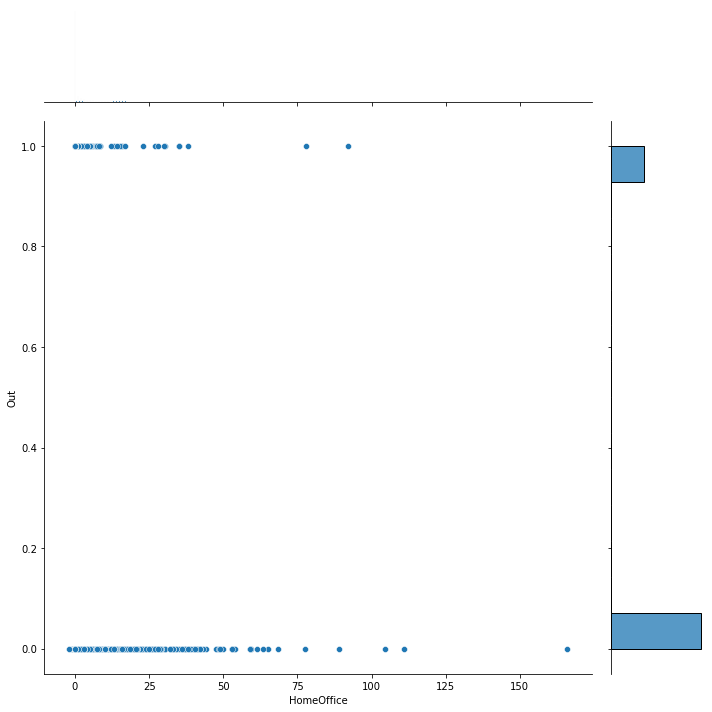

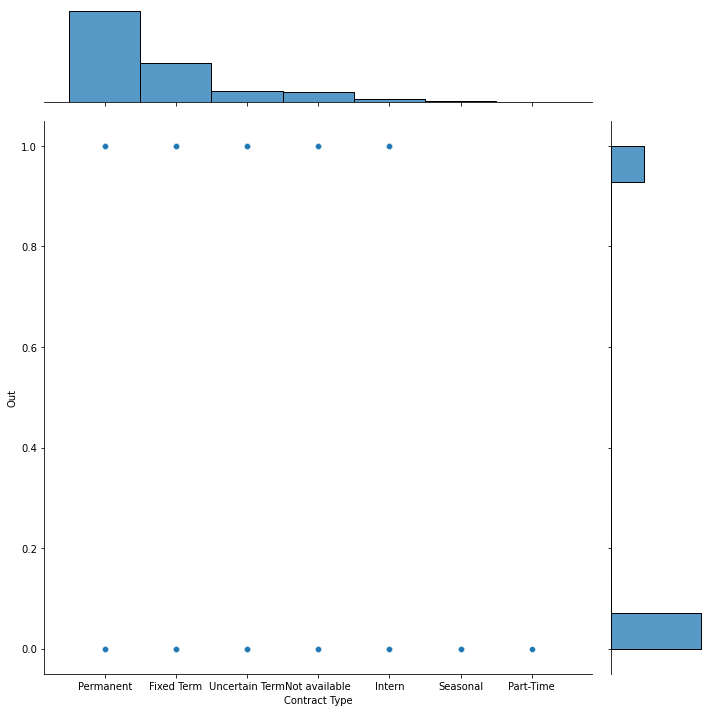

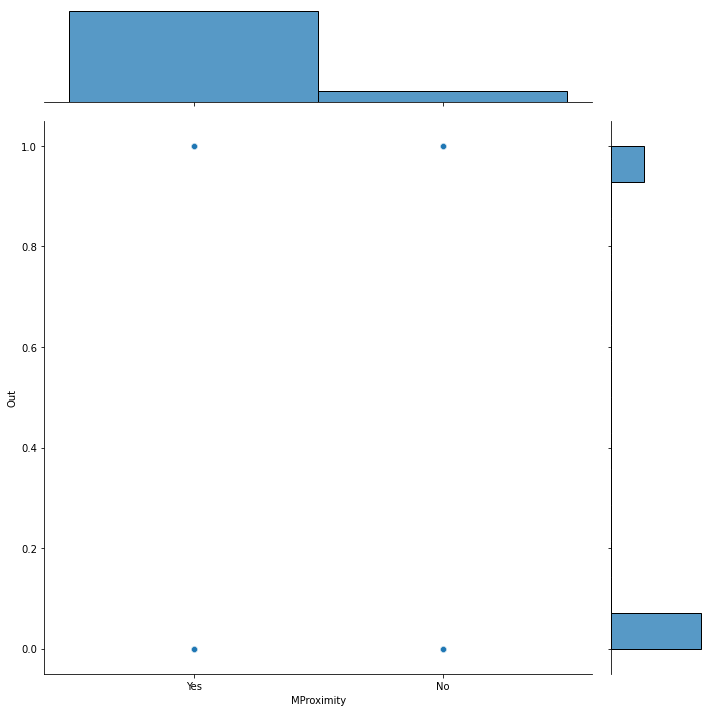

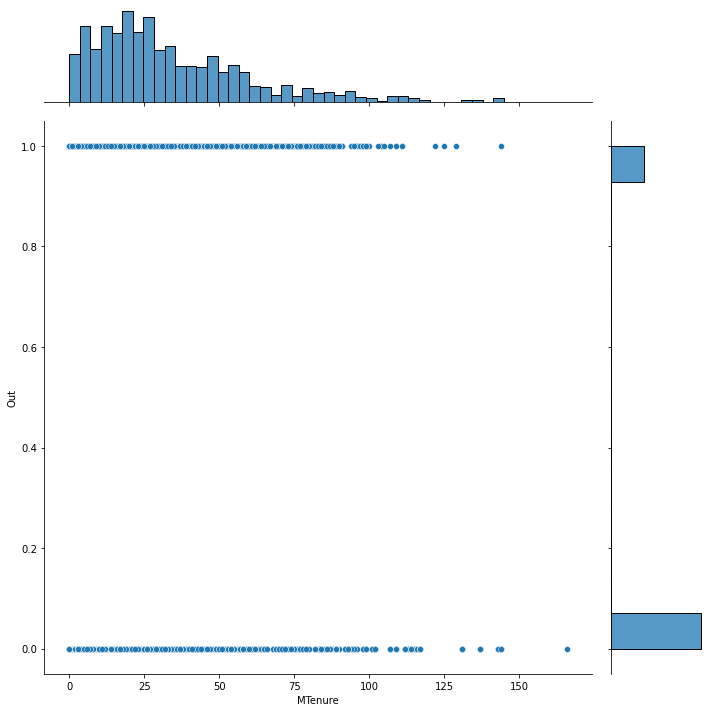

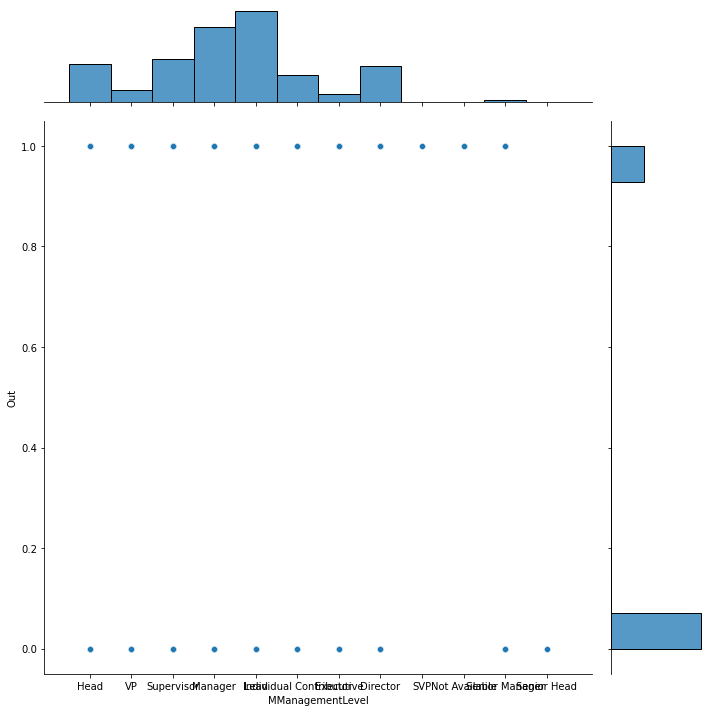

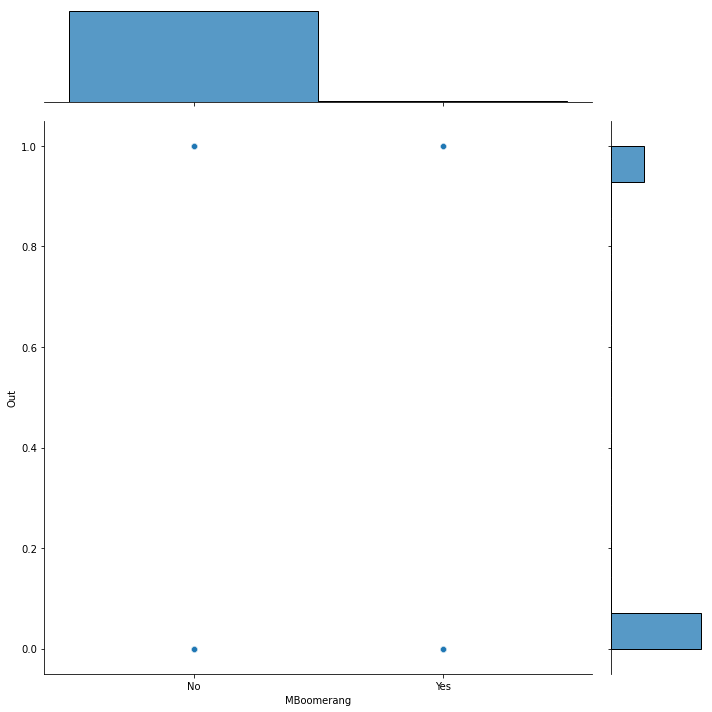

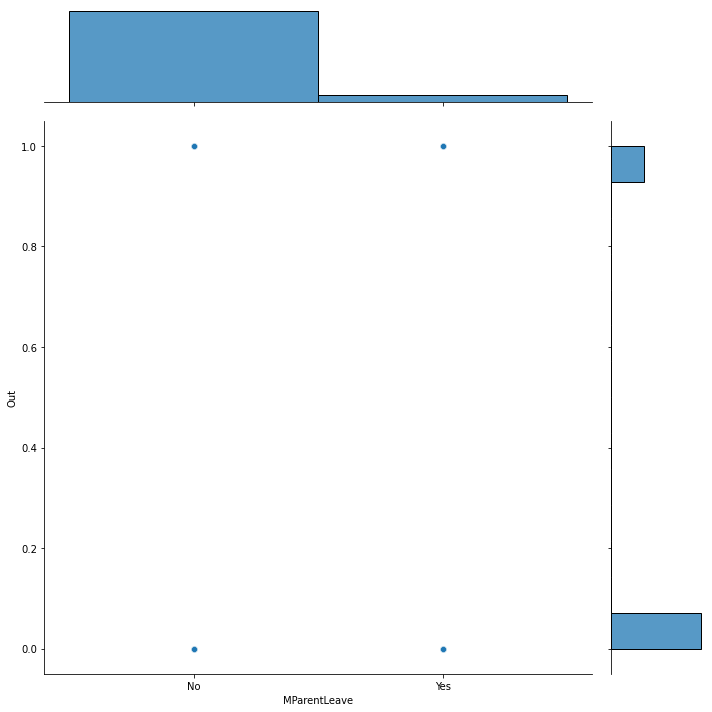

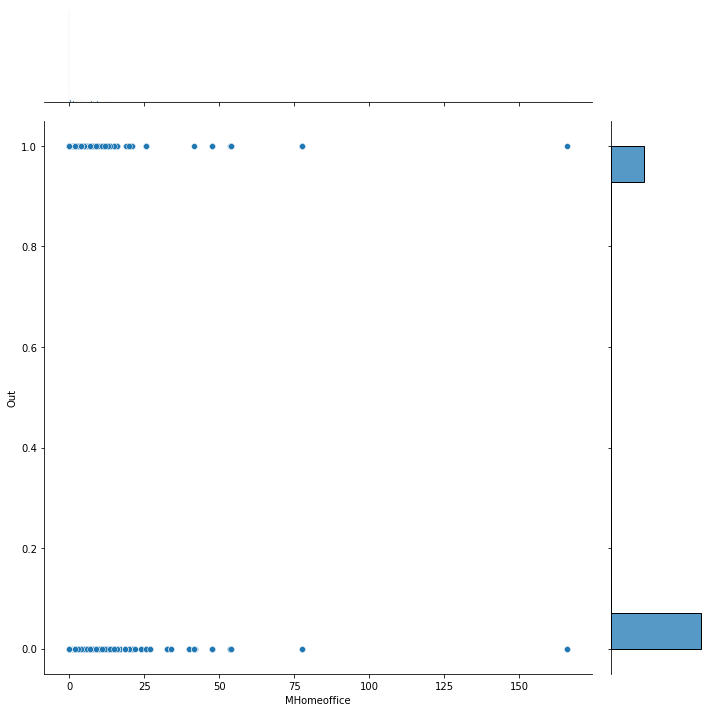

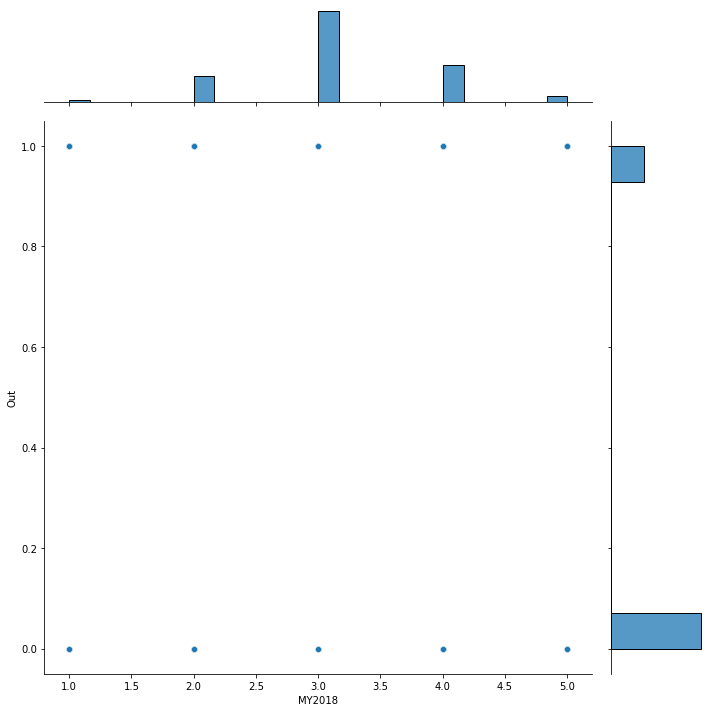

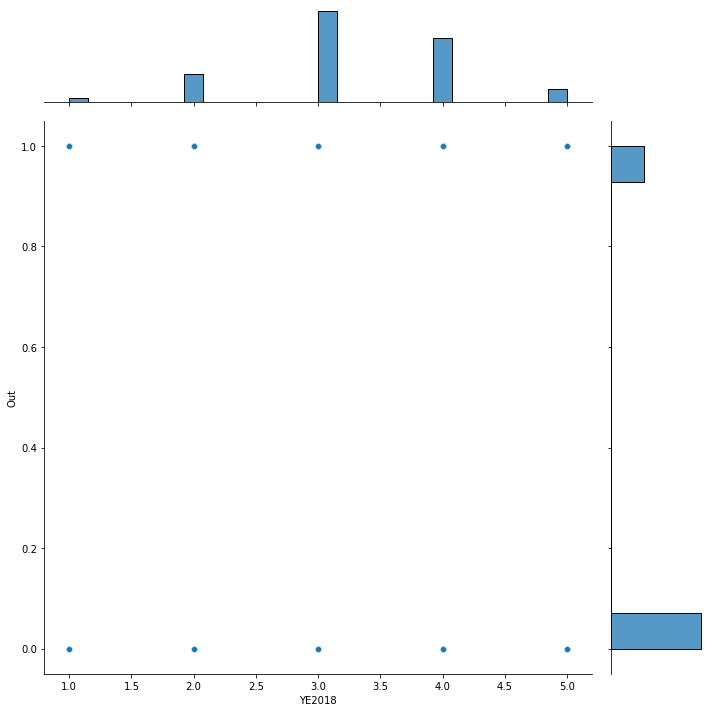

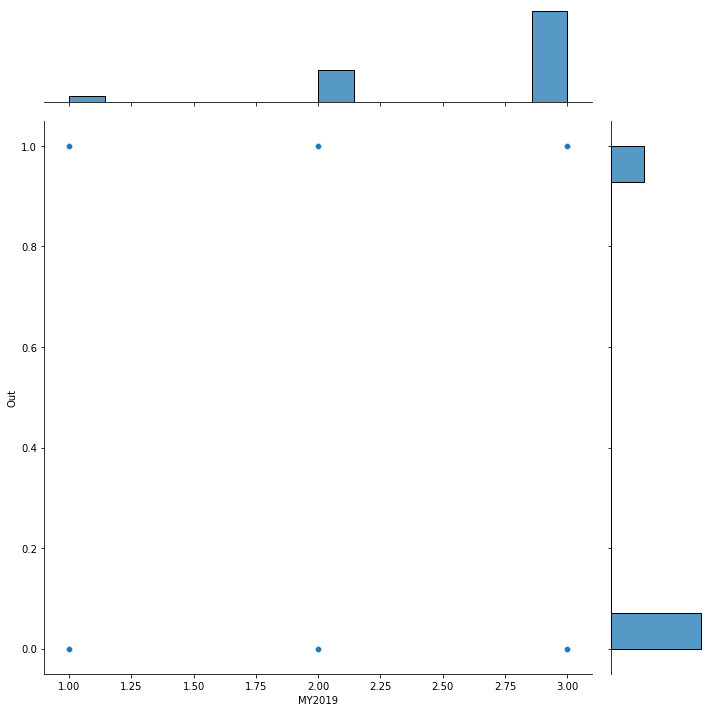

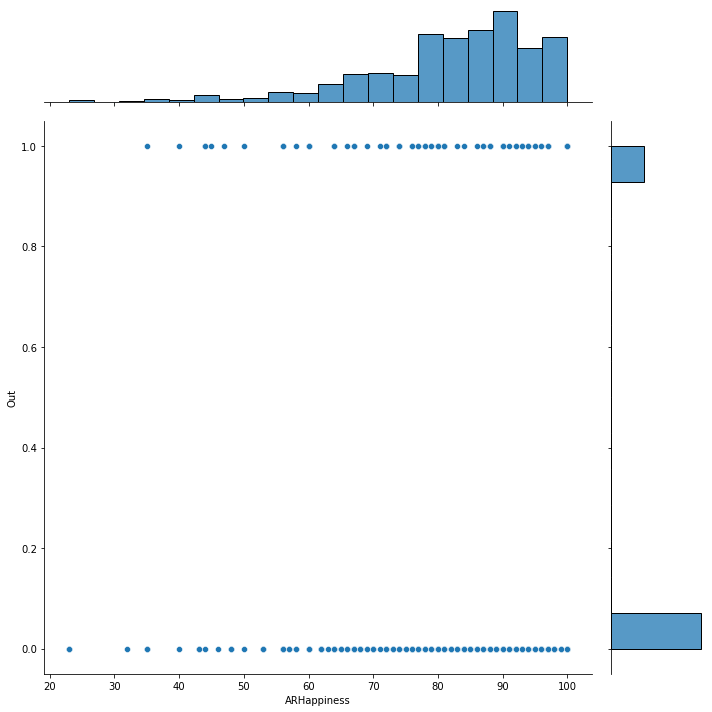

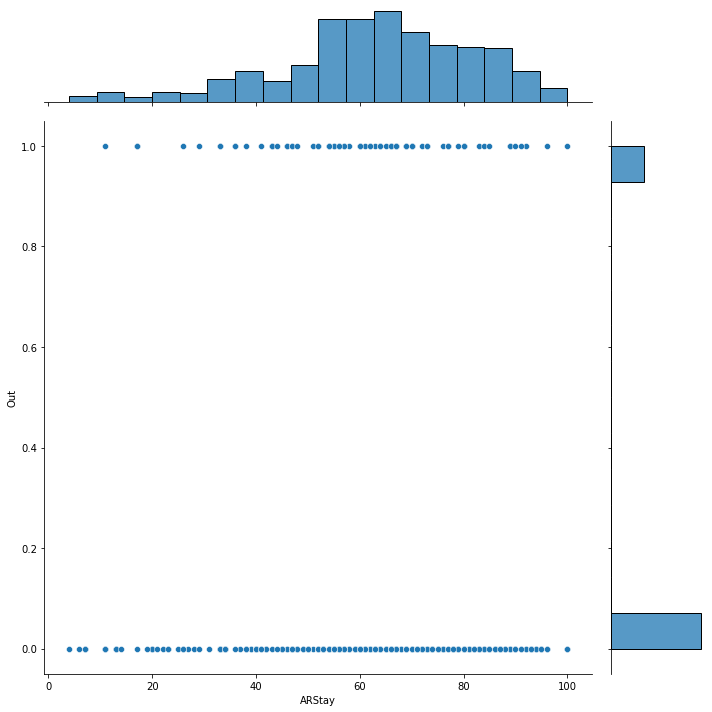

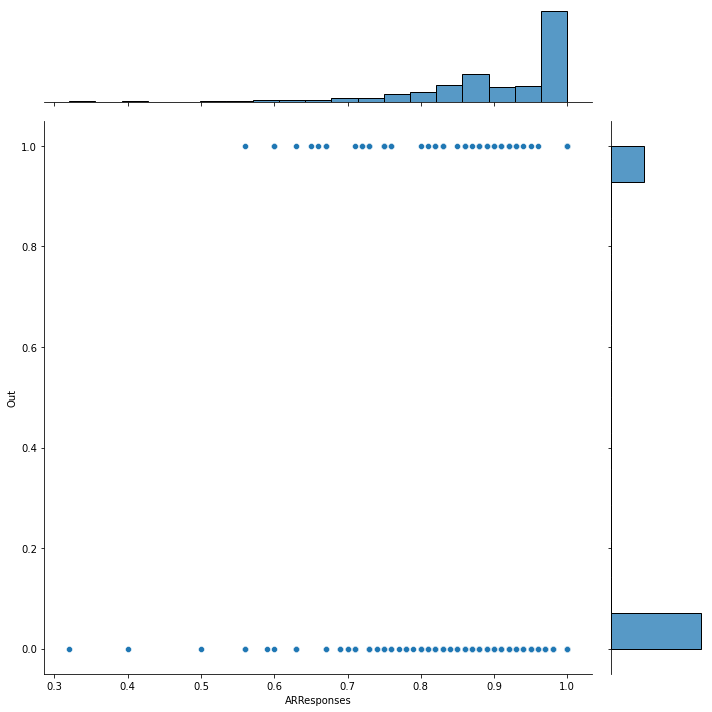

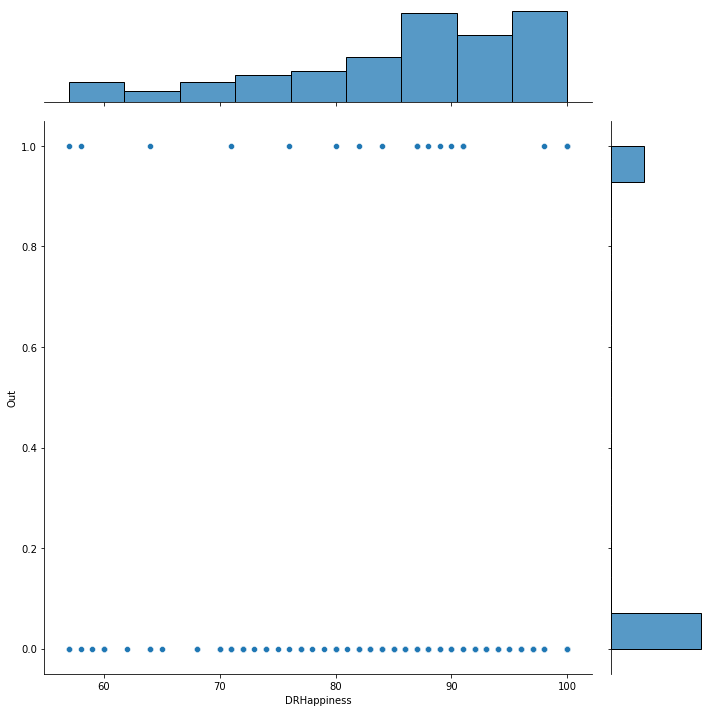

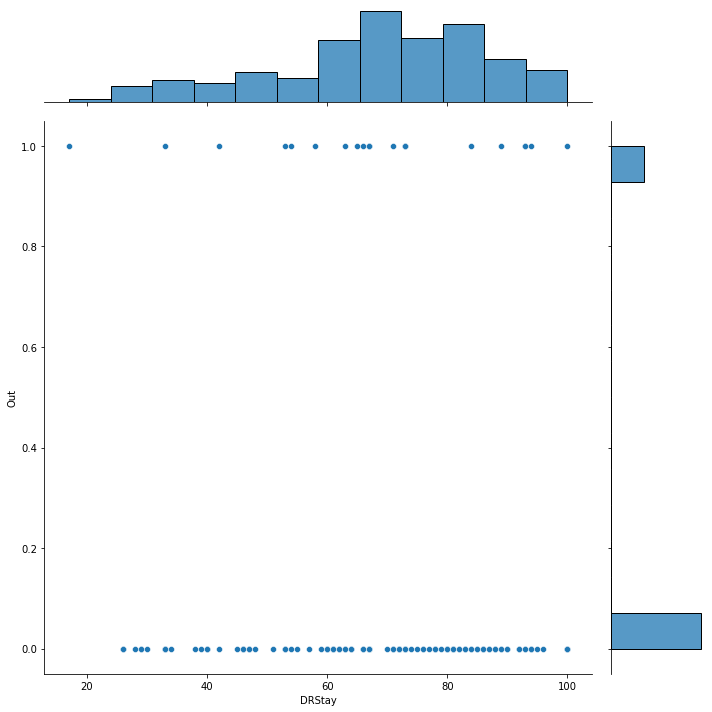

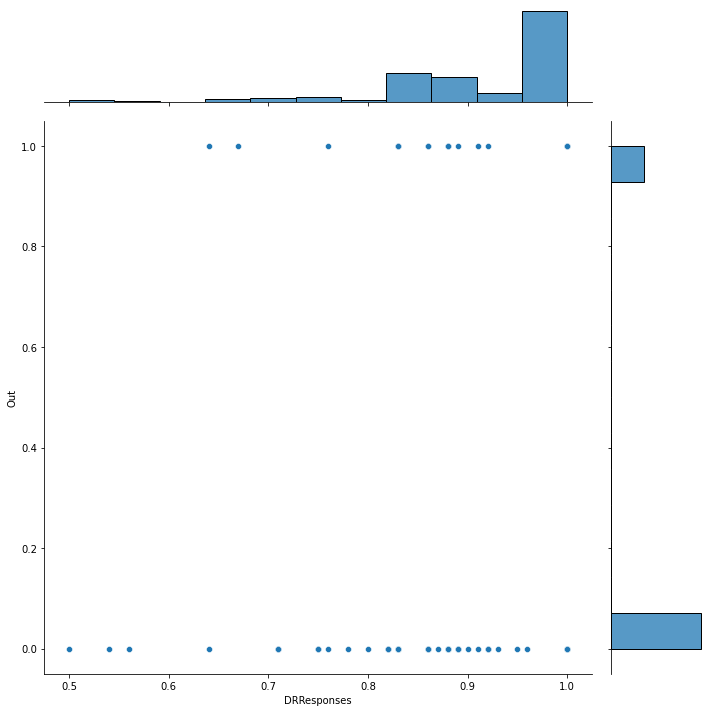

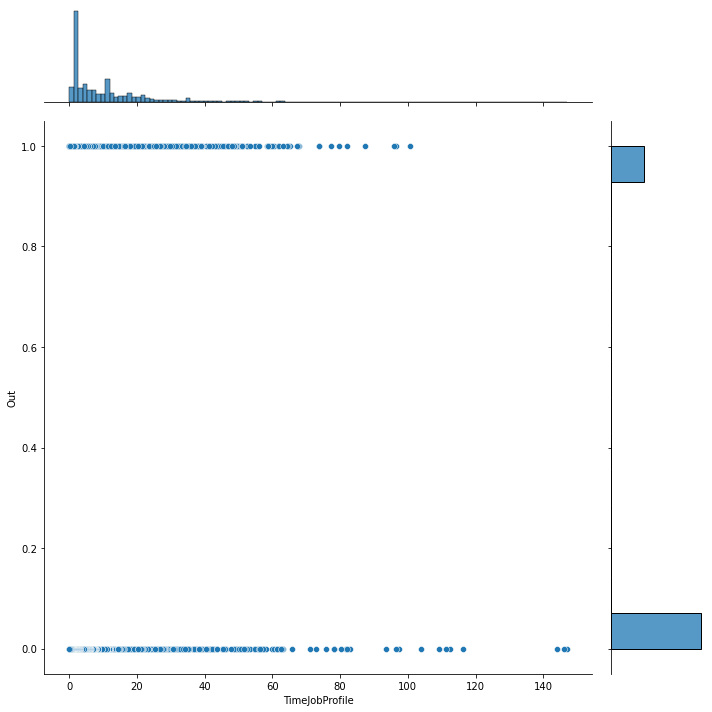

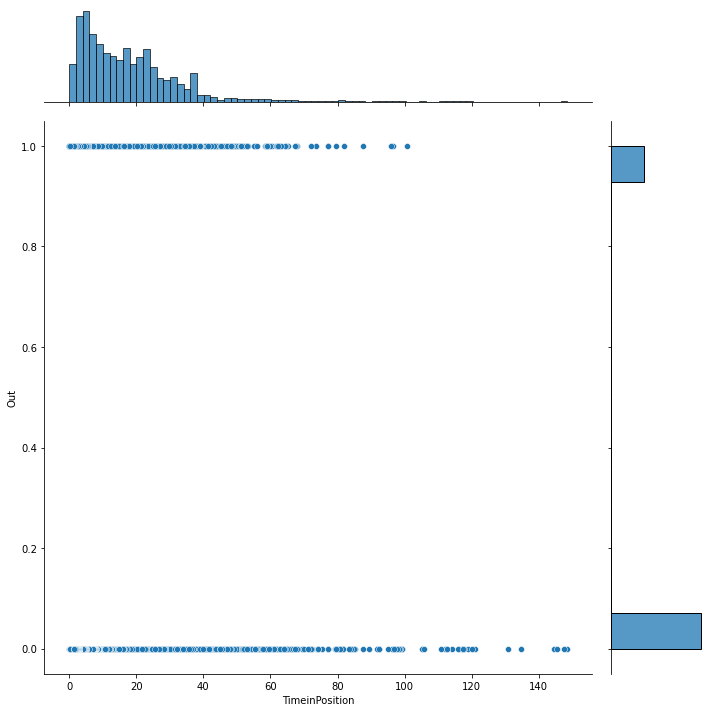

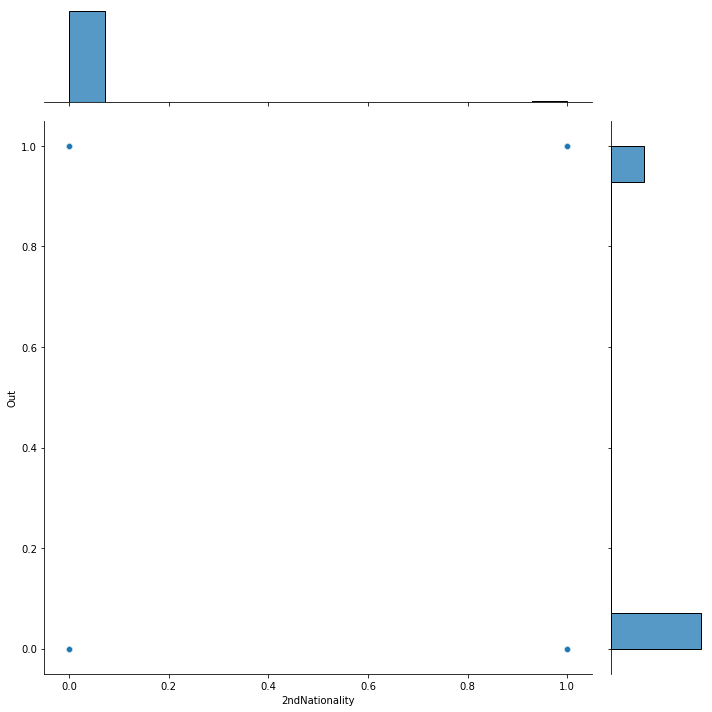

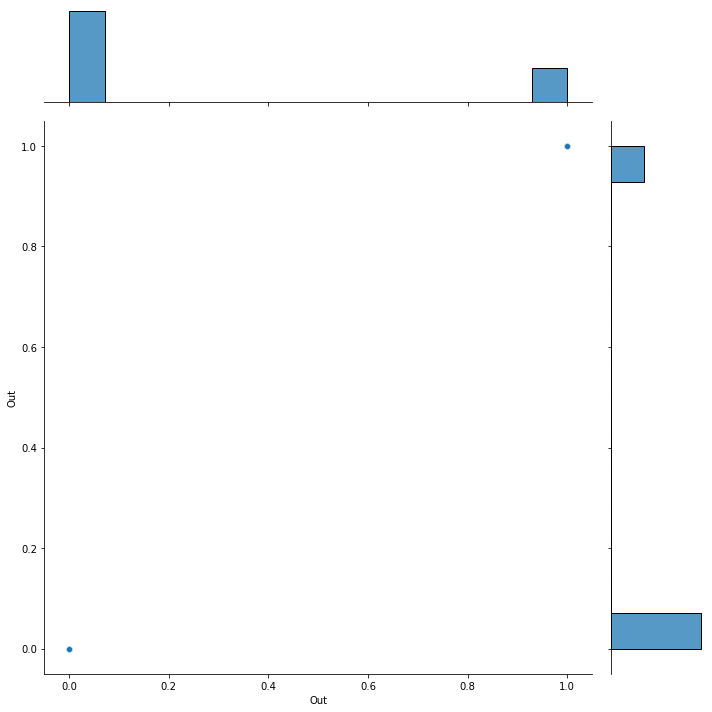

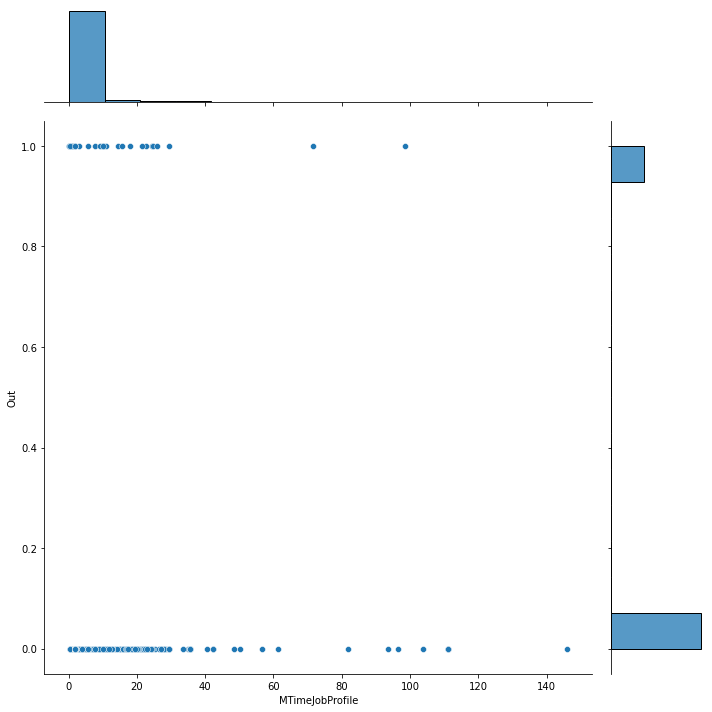

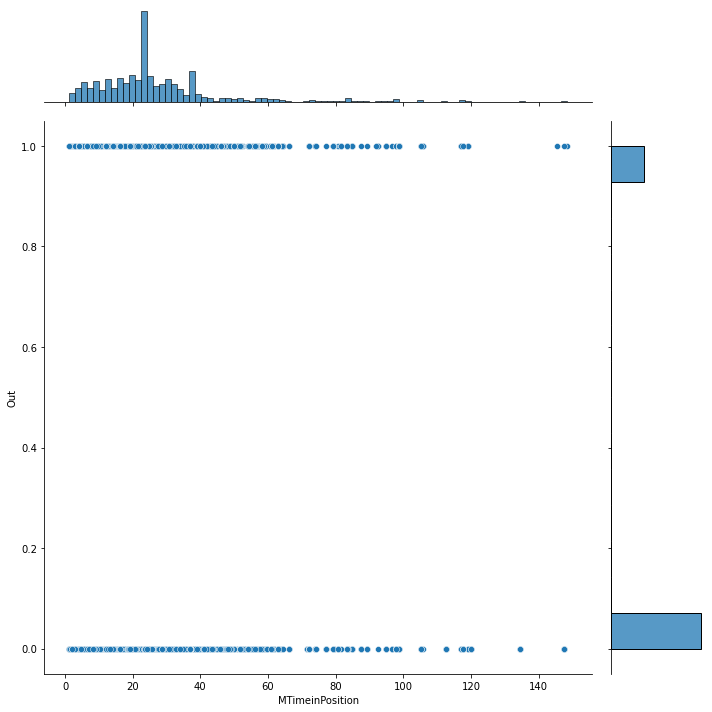

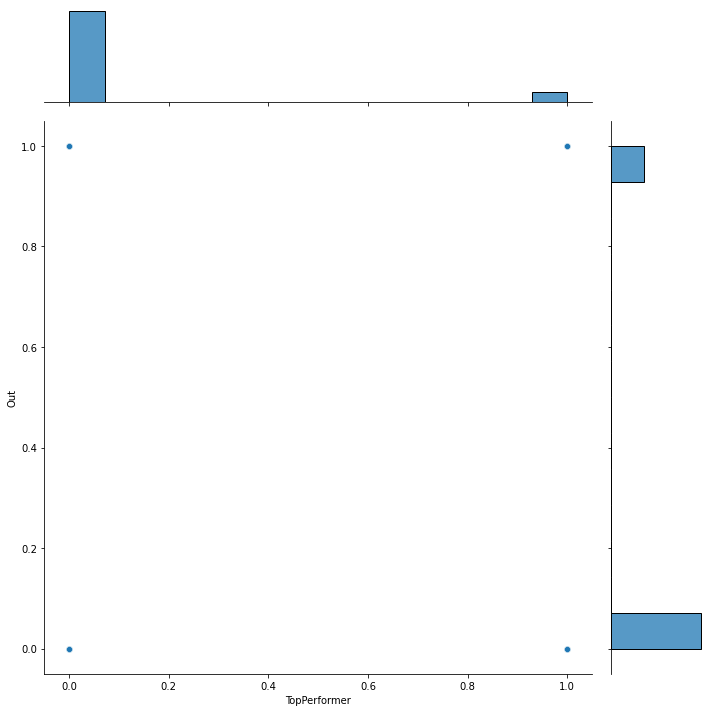

In [73]:
for col in joint.columns:
    sns.jointplot(x = joint[col] , y = joint['Out'], height = 10)

---

**To continue our graphical observation of the relationships between variables (in this case only the numerical ones) *vs* target Out variable a pairplots view is provided.**

In [74]:
numerical1 = ['Age', 'Dependents', 'EmployeeCount', 'HireCount', 'TerminationCount', 'Tenure']

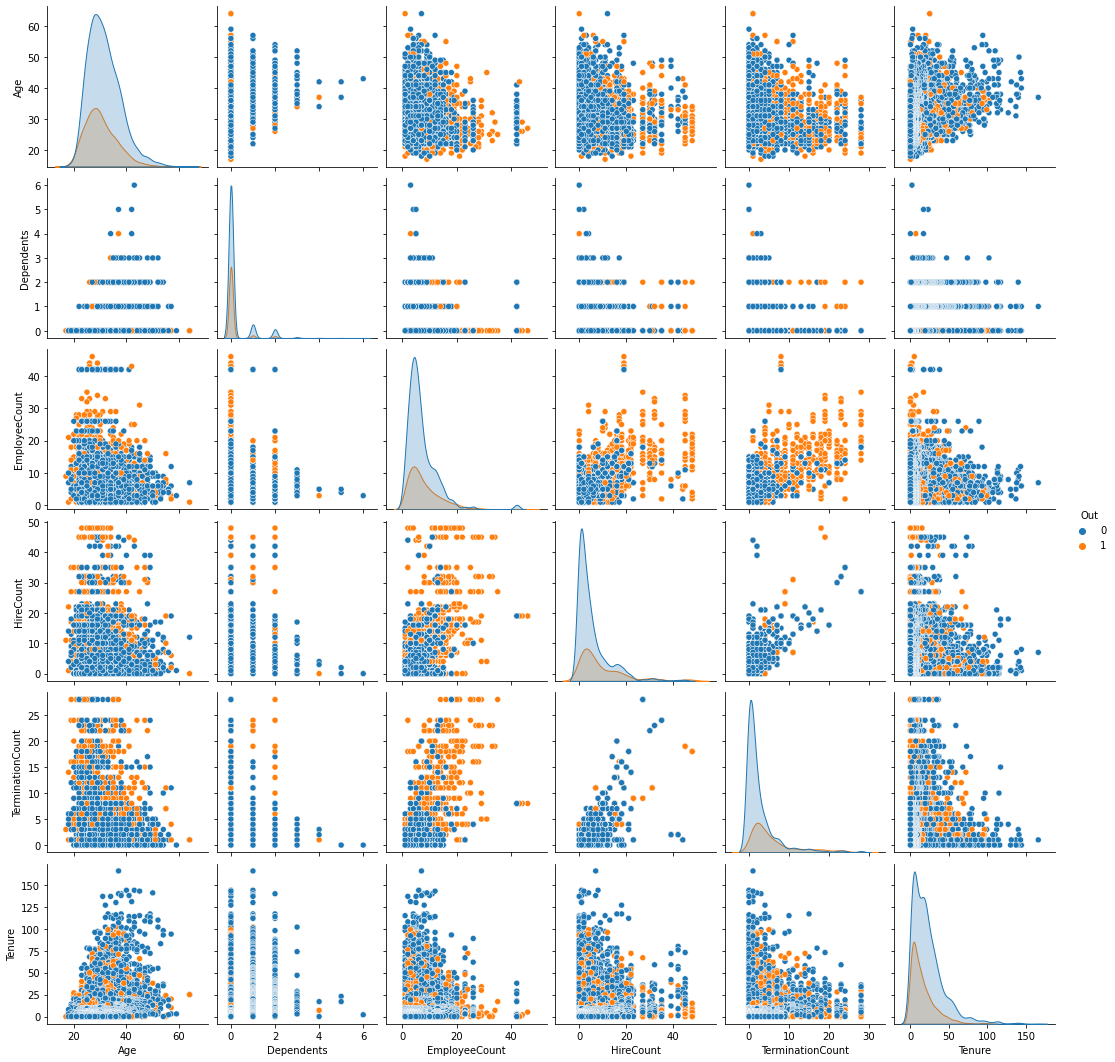

In [75]:
pair1 = sns.pairplot(df[[*numerical1, 'Out']], hue='Out')

In [76]:
numerical2 = ['PayIncrease', 'HomeOffice', 'MTenure', 'MHomeoffice', 'ARHappiness','ARStay','ARResponses']
numerical3 = ['DRHappiness', 'DRStay','DRResponses','TimeJobProfile','TimeinPosition','2ndNationality']
numerical4 = ['MTimeJobProfile','MTimeinPosition','TopPerformer']

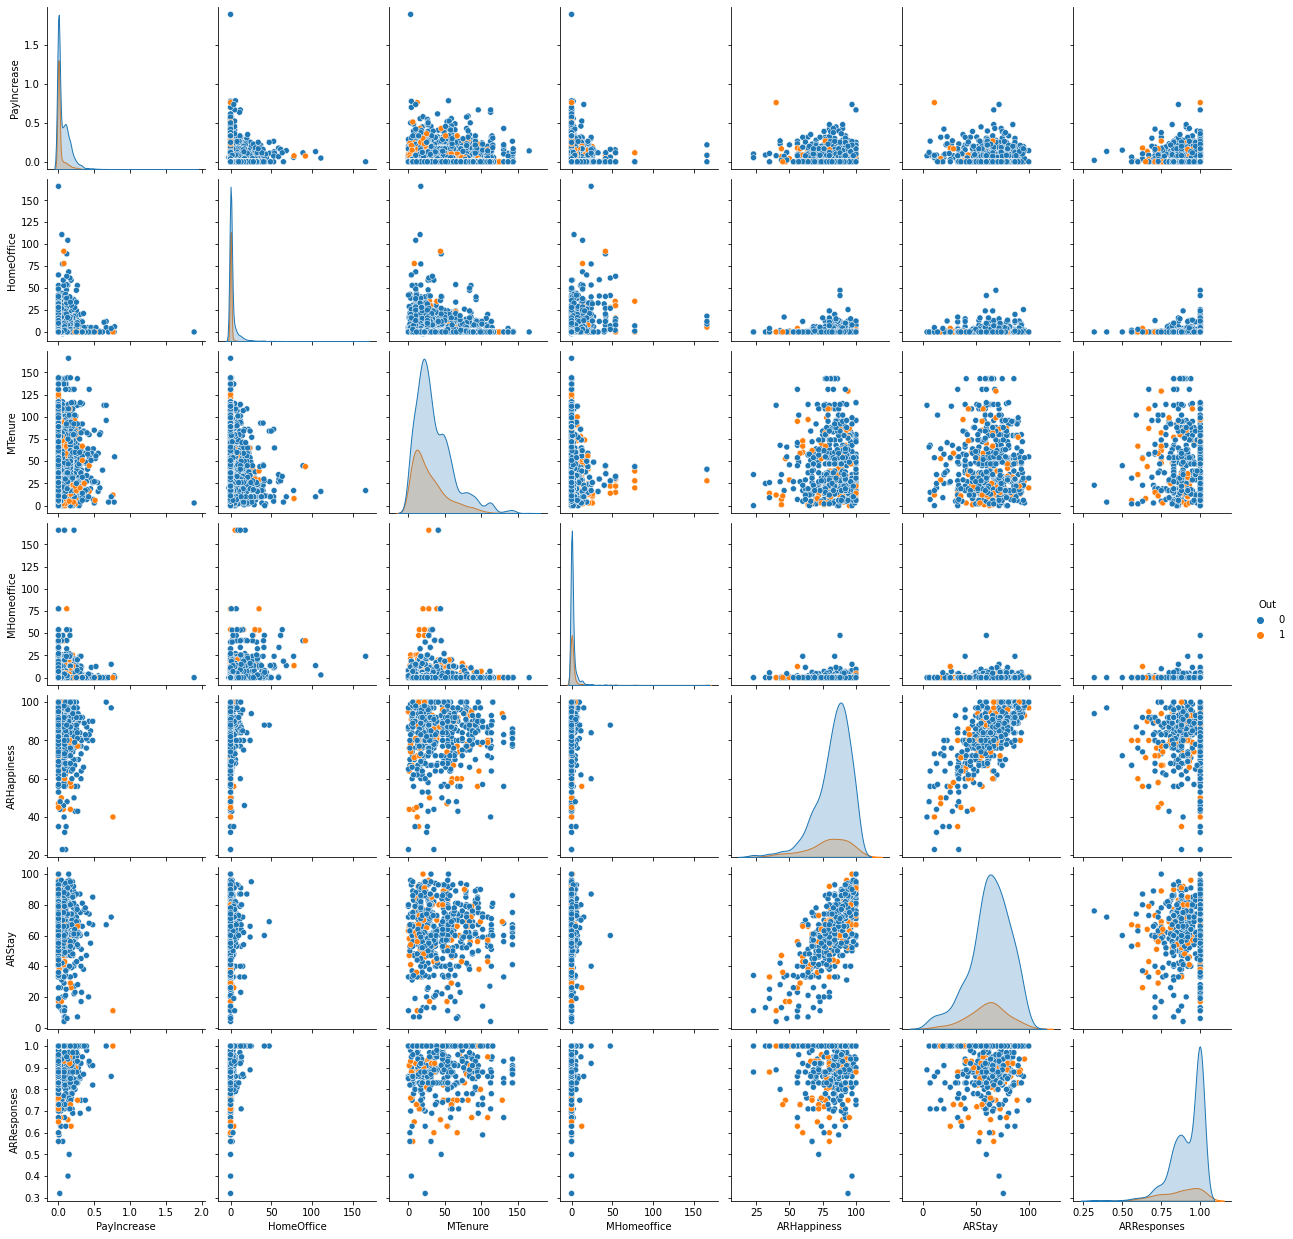

In [77]:
pair2 = sns.pairplot(df[[*numerical2, 'Out']], hue='Out')

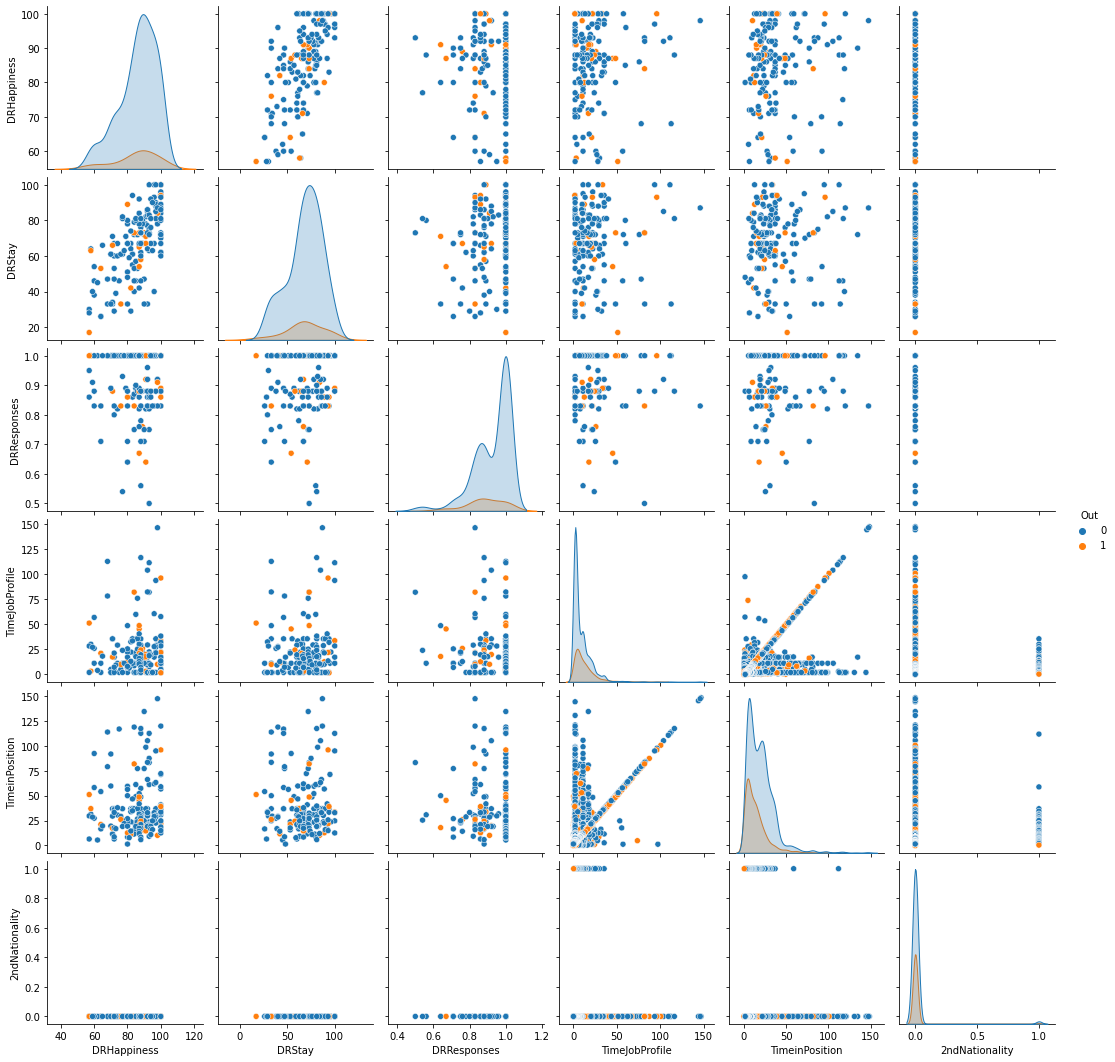

In [78]:
pair3 = sns.pairplot(df[[*numerical3, 'Out']], hue='Out')

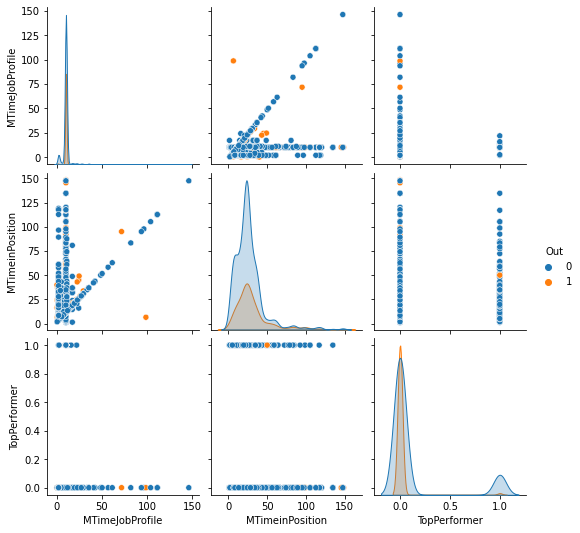

In [79]:
pair4 = sns.pairplot(df[[*numerical4, 'Out']], hue='Out')

**Although useful to understand variables relationship amongst each other, we are now looking for the variable that is the most impactful on the prediction of an employee exit from the Organization. So, we will now show individual bar plots that will helps us further.**

In [80]:
variables1 = ['Rehire', 'Generation', 'CostCenterH', 'Gender', 'ManagementLevel']
variables2 = ["BLeave", "BTimeOut", "ParentLeave", "Contract Type", "MProximity"]
variables3 = ["MManagementLevel", "MBoomerang", "MParentLeave"]
variables4 = ["OfficeLocation", "Country", "ModNationality", "MOfficeLocation", "MCountry"]

Out        0     1
Rehire            
No      72.7  27.3
Yes     82.3  17.7


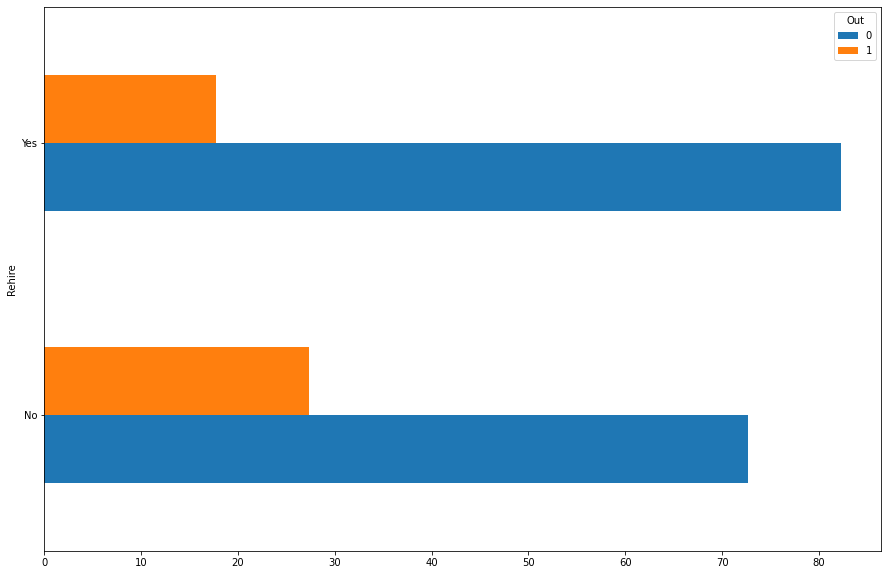

Out                                         0     1
Generation                                         
Baby Boomers (1946 -1964)                53.8  46.2
Generation X (1965 -1980)                73.1  26.9
Generation Y / Millennials (1981 -1996)  73.4  26.6
Generation Z (1997 and onwards)          67.0  33.0
Not Available                            14.3  85.7


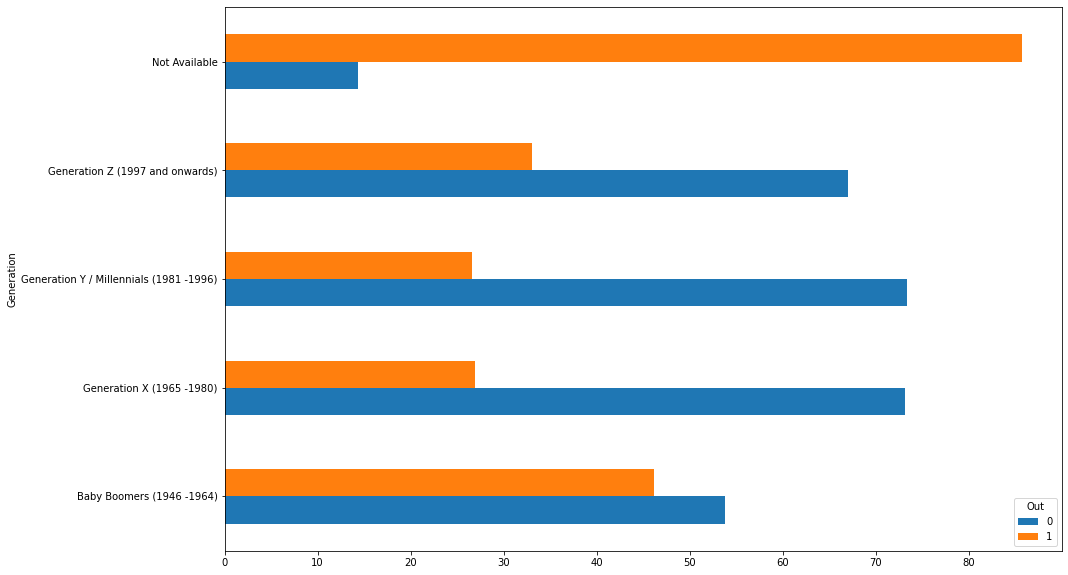

Out                                   0      1
CostCenterH                                   
Commercial                         72.6   27.4
Content                            83.3   16.7
Creative Services                  83.3   16.7
Digital Production                 67.1   32.9
Finance                            78.3   21.7
Global People Team                 75.8   24.2
Local People Team                 100.0    NaN
Management                         80.0   20.0
Marketing                          75.5   24.5
Marketing Offline                   7.1   92.9
Marketplace Trading and Strategy   78.6   21.4
Office Management                  74.6   25.4
Online Sales                      100.0    NaN
Operations                         64.8   35.2
Private Client                     79.2   20.8
Product                            72.1   27.9
Production Planning                86.2   13.8
Service Design                     71.8   28.2
Strategic Commission                NaN  100.0
Strategy     

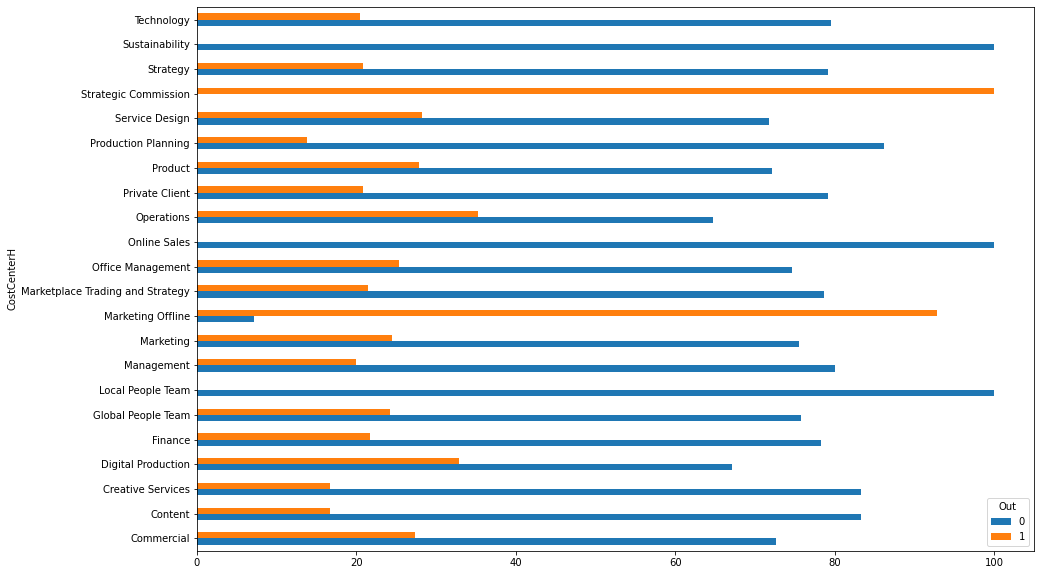

Out               0     1
Gender                   
Female         71.3  28.7
Male           74.9  25.1
Not Available  11.1  88.9


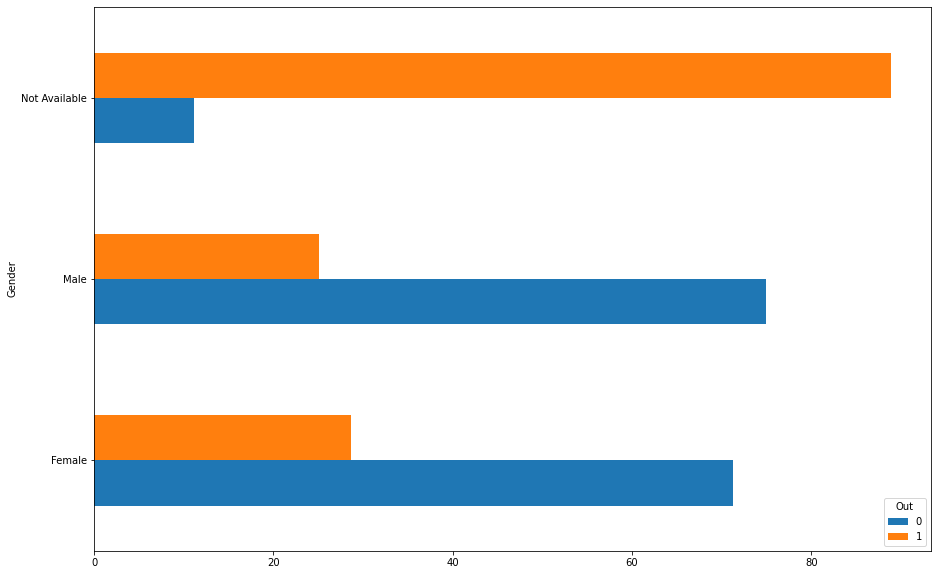

Out                         0     1
ManagementLevel                    
Director                 82.8  17.2
Executive                93.0   7.0
Head                     84.9  15.1
Individual Contributor   70.9  29.1
Lead                     81.1  18.9
Manager                  81.3  18.7
Not Available           100.0   NaN
Senior Head             100.0   NaN
Senior Manager          100.0   NaN
Supervisor               67.9  32.1
VP                       92.0   8.0


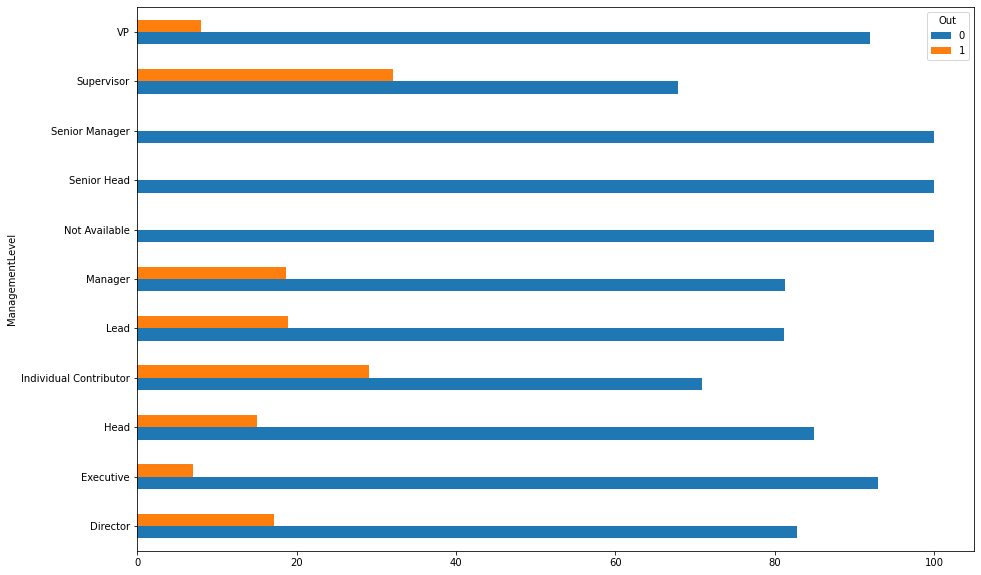

In [81]:
variables1 = ['Rehire', 'Generation', 'CostCenterH', 'Gender', 'ManagementLevel']
for var in variables1:
    predict = df.groupby(var)['Out'].value_counts(normalize = True).mul(100).round(1).unstack()
    print(predict)
    predict.plot.barh(
        figsize=(15,10)
    )
    plt.show()

Out         0     1
BLeave             
No       72.6  27.4
Yes     100.0   NaN


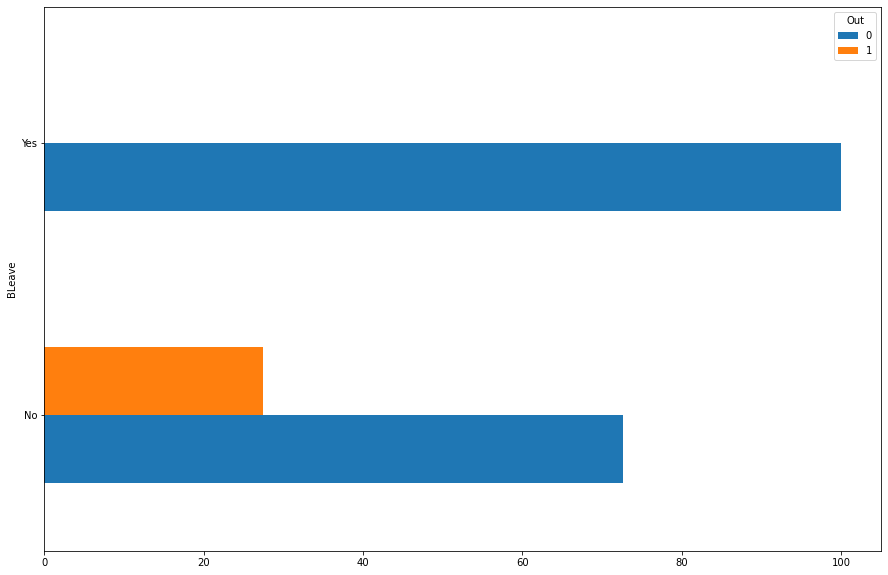

Out           0     1
BTimeOut             
No         72.8  27.2
Yes       100.0   NaN


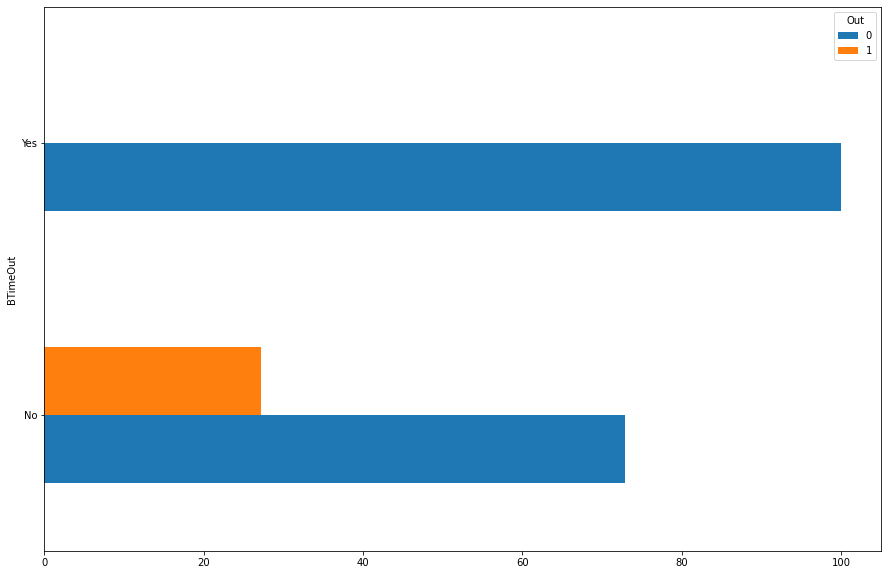

Out             0     1
ParentLeave            
No           72.3  27.7
Yes          92.7   7.3


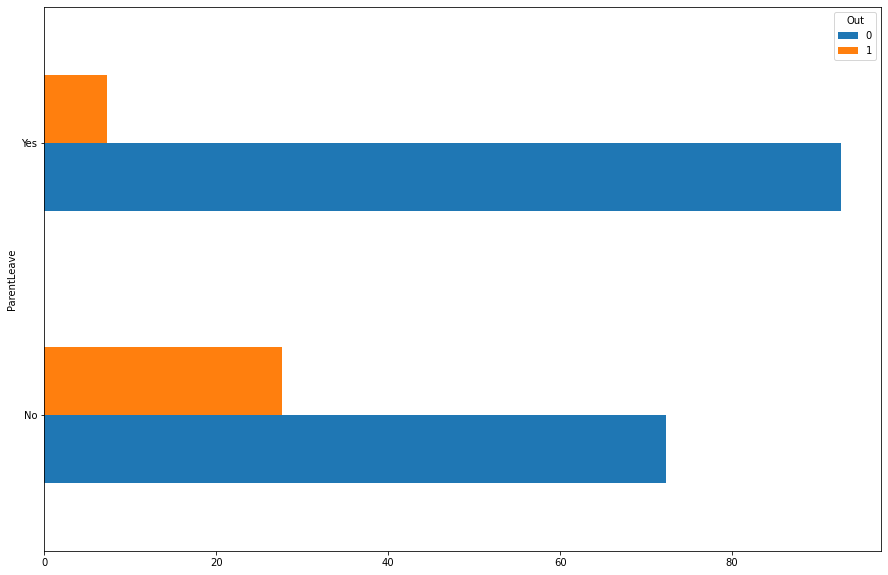

Out                 0     1
Contract Type              
Fixed Term       72.6  27.4
Intern           58.9  41.1
Not available     3.4  96.6
Part-Time       100.0   NaN
Permanent        83.5  16.5
Seasonal        100.0   NaN
Uncertain Term   50.9  49.1


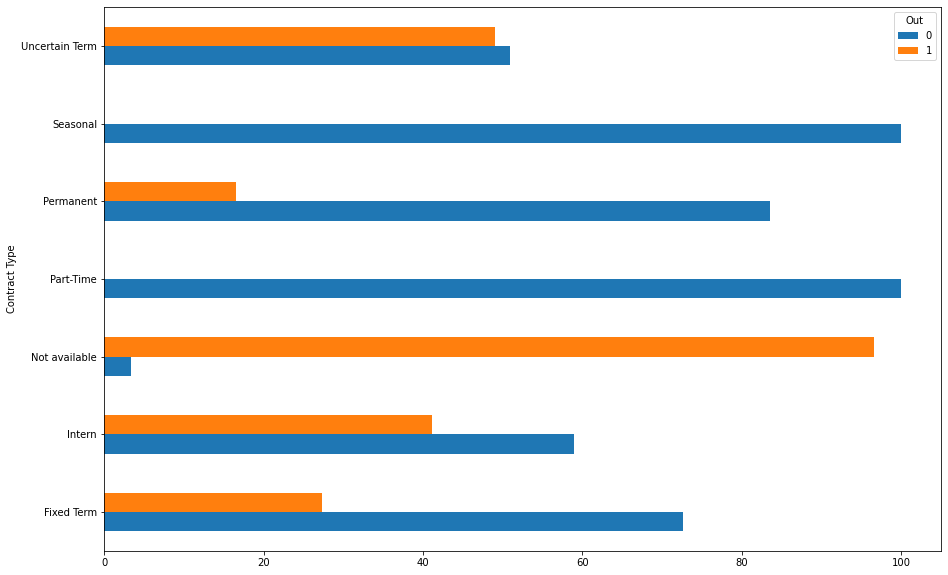

Out            0     1
MProximity            
No          69.3  30.7
Yes         73.4  26.6


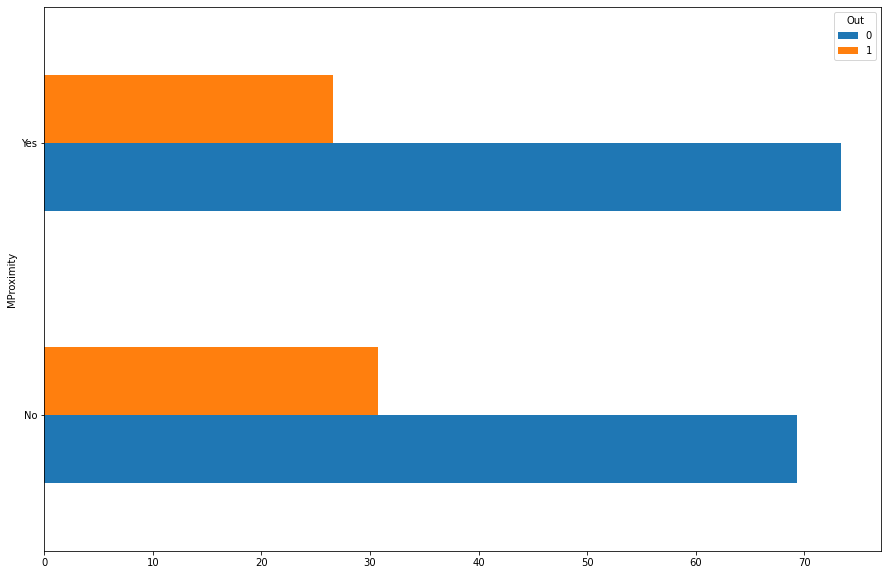

In [82]:
variables2 = ["BLeave", "BTimeOut", "ParentLeave", "Contract Type", "MProximity"]
for var in variables2:
    predict = df.groupby(var)['Out'].value_counts(normalize = True).mul(100).round(1).unstack()
    print(predict)
    predict.plot.barh(
        figsize=(15,10)
    )
    plt.show()

Out                         0      1
MManagementLevel                    
Director                 70.9   29.1
Executive                86.2   13.8
Head                     75.8   24.2
Individual Contributor   76.2   23.8
Lead                     74.7   25.3
Manager                  75.6   24.4
Not Available             NaN  100.0
SVP                       NaN  100.0
Senior Head             100.0    NaN
Senior Manager           82.1   17.9
Supervisor               58.9   41.1
VP                       75.9   24.1


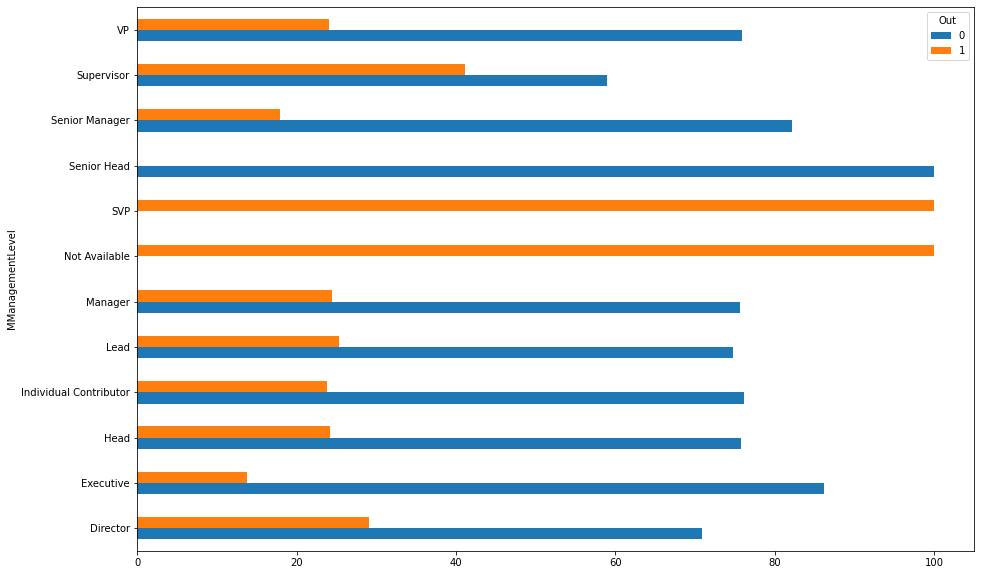

Out            0     1
MBoomerang            
No          72.9  27.1
Yes         85.7  14.3


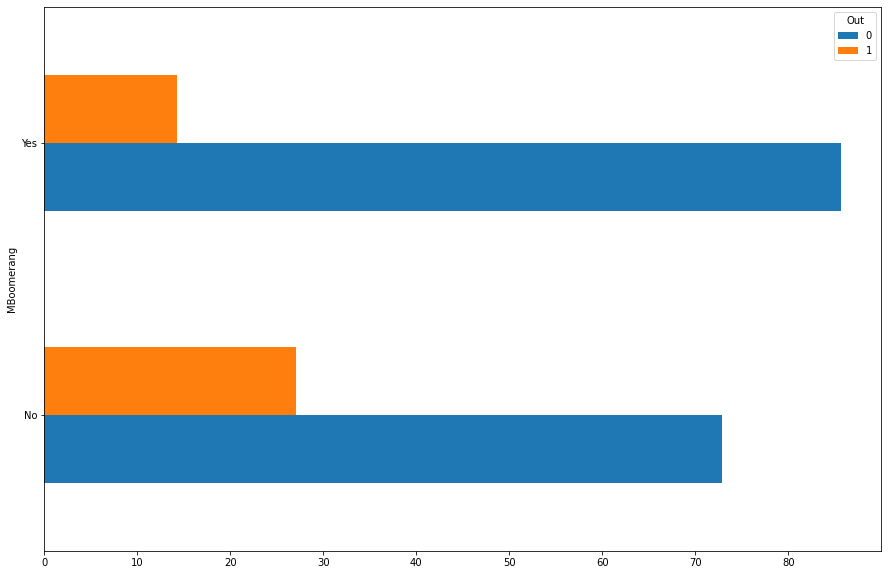

Out              0     1
MParentLeave            
No            72.9  27.1
Yes           74.4  25.6


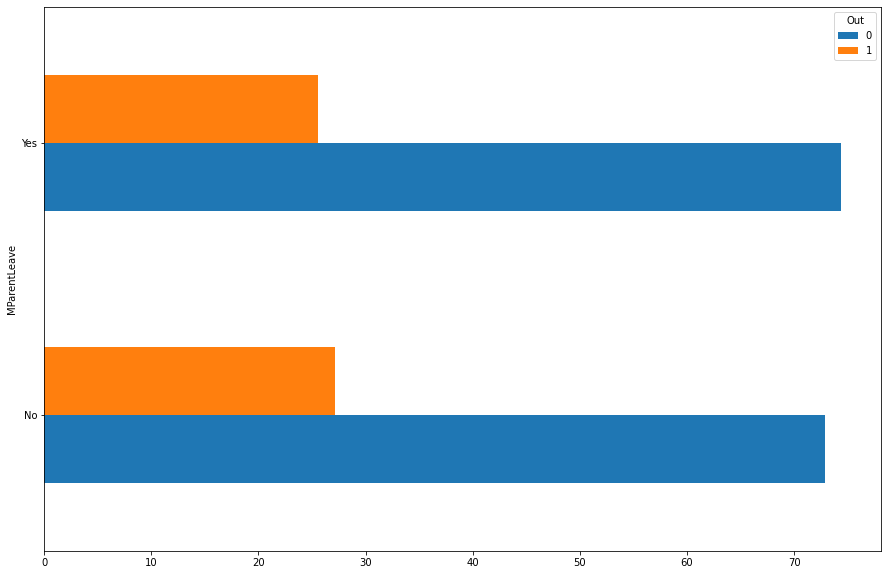

In [83]:
variables3 = ["MManagementLevel", "MBoomerang", "MParentLeave"]
for var in variables3:
    predict = df.groupby(var)['Out'].value_counts(normalize = True).mul(100).round(1).unstack()
    print(predict)
    predict.plot.barh(
        figsize=(15,10)
    )
    plt.show()

Out                            0      1
OfficeLocation                         
Beijing - TechTemple        56.6   43.4
Braga                       96.3    3.7
Dubai                       91.7    8.3
Guimarães                   71.6   28.4
Hong Kong - Genesis         64.1   35.9
Lisbon - D. Luís            63.8   36.2
Lisbon - Docas              79.3   20.7
London                      74.6   25.4
Los Angeles - Arts          50.0   50.0
Los Angeles - Bloc          62.9   37.1
Moscow                      73.3   26.7
New York                    86.9   13.1
Other                       89.5   10.5
Porto                        NaN  100.0
Porto - Boavista            90.2    9.8
Porto - Lionesa             85.2   14.8
Shanghai - One Museum       86.1   13.9
Shanghai - WTT               NaN  100.0
Shanghai - Yanping           NaN  100.0
São Paulo                    NaN  100.0
São Paulo - Santos Augusta  61.1   38.9
São Paulo - Visconde        79.4   20.6
Tokyo                       64.2   35.8


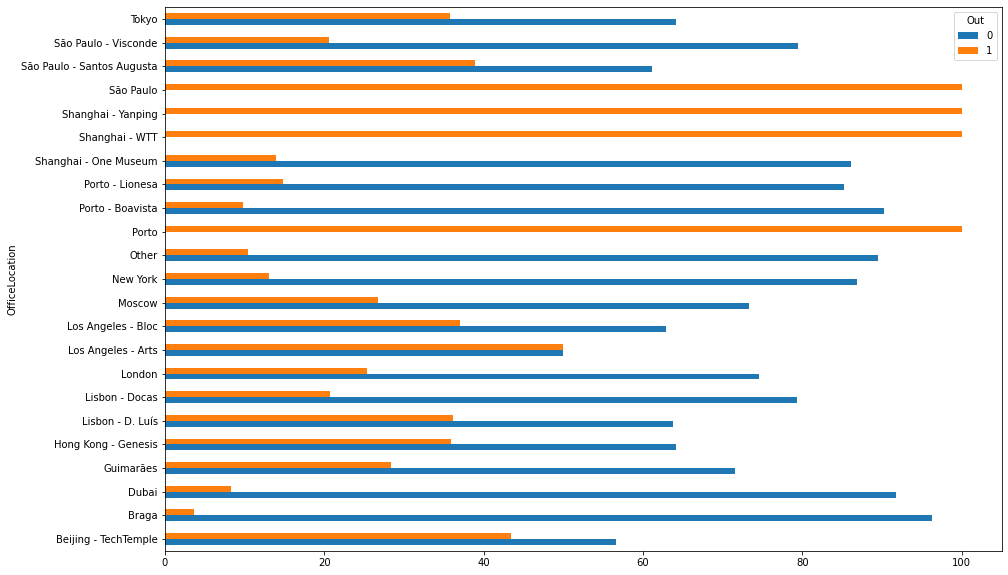

Out          0     1
Country             
Brazil    51.5  48.5
China     67.9  32.1
Dubai     91.7   8.3
Japan     64.2  35.8
Other     89.5  10.5
Portugal  75.5  24.5
Russia    73.3  26.7
UK        74.6  25.4
USA       66.4  33.6


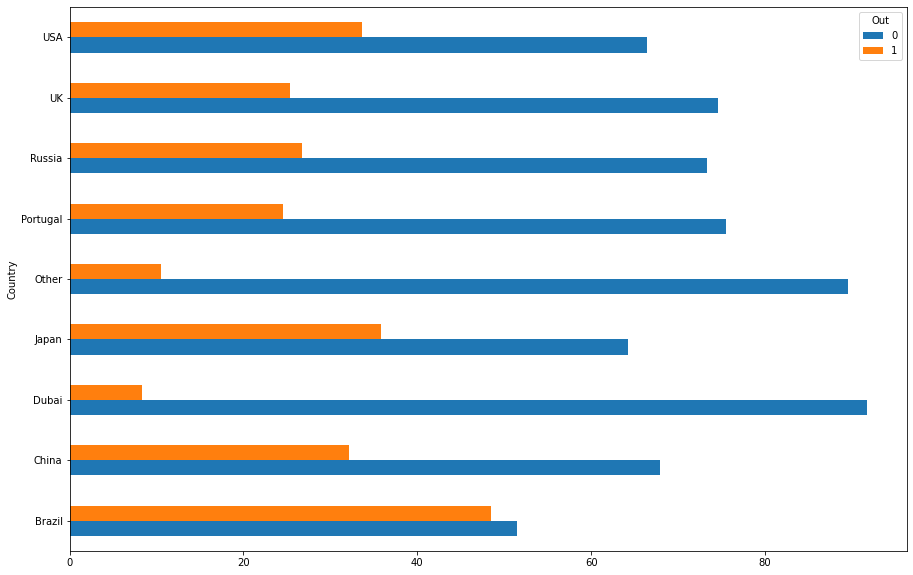

Out                          0     1
ModNationality                      
Brazil                    70.1  29.9
China                     73.1  26.9
France                    73.8  26.2
Germany                   79.2  20.8
Hong Kong                 72.7  27.3
Italy                     68.6  31.4
Japan                     71.6  28.4
Others                    73.2  26.8
Portugal                  81.5  18.5
Russian Federation        77.0  23.0
Spain                     60.0  40.0
United Kingdom            77.6  22.4
United States of America  74.0  26.0


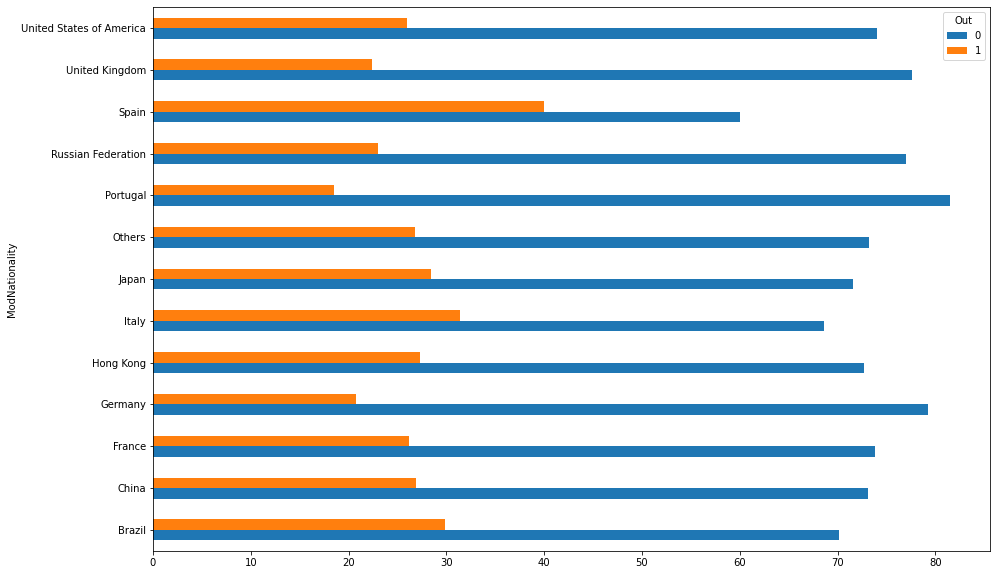

Out                            0      1
MOfficeLocation                        
Beijing - TechTemple        52.8   47.2
Braga                       96.5    3.5
Dubai                       91.8    8.2
Guimarães                   72.3   27.7
Hong Kong - Genesis         67.2   32.8
Lisbon - D. Luís            63.7   36.3
Lisbon - Docas              84.0   16.0
London                      75.3   24.7
Los Angeles - Arts          47.0   53.0
Los Angeles - Bloc          66.5   33.5
Moscow                      68.9   31.1
New York                    83.3   16.7
Other                       80.0   20.0
Porto                        NaN  100.0
Porto - Boavista            86.9   13.1
Porto - Lionesa             86.1   13.9
Shanghai - One Museum       85.6   14.4
Shanghai - WTT               NaN  100.0
Shanghai - Yanping           NaN  100.0
São Paulo                    NaN  100.0
São Paulo - Santos Augusta  62.0   38.0
São Paulo - Visconde        69.0   31.0
Tokyo                       63.8   36.2


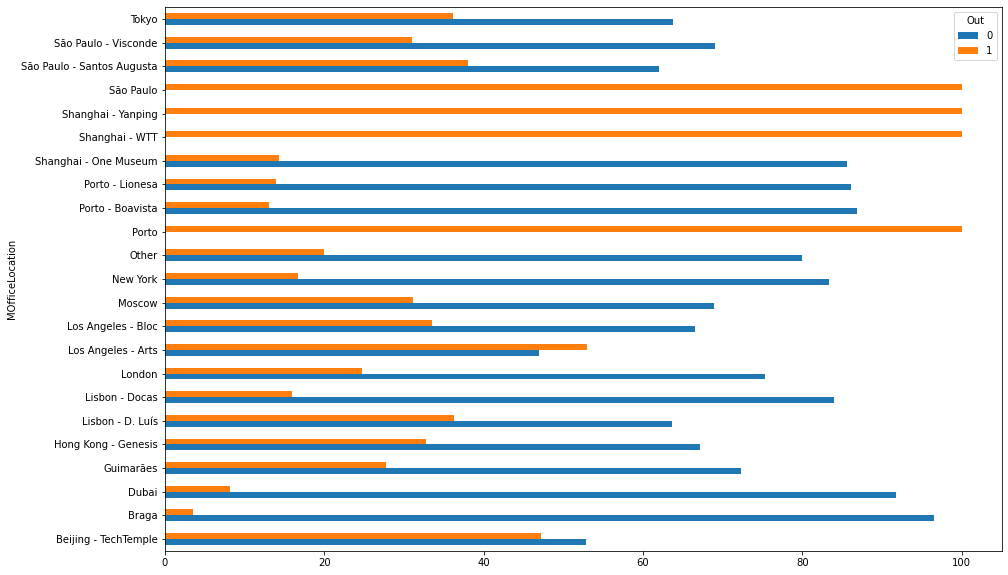

Out          0     1
MCountry            
Brazil    51.7  48.3
China     69.2  30.8
Dubai     91.8   8.2
Japan     63.8  36.2
Other     80.0  20.0
Portugal  75.2  24.8
Russia    68.9  31.1
UK        75.3  24.7
USA       66.6  33.4


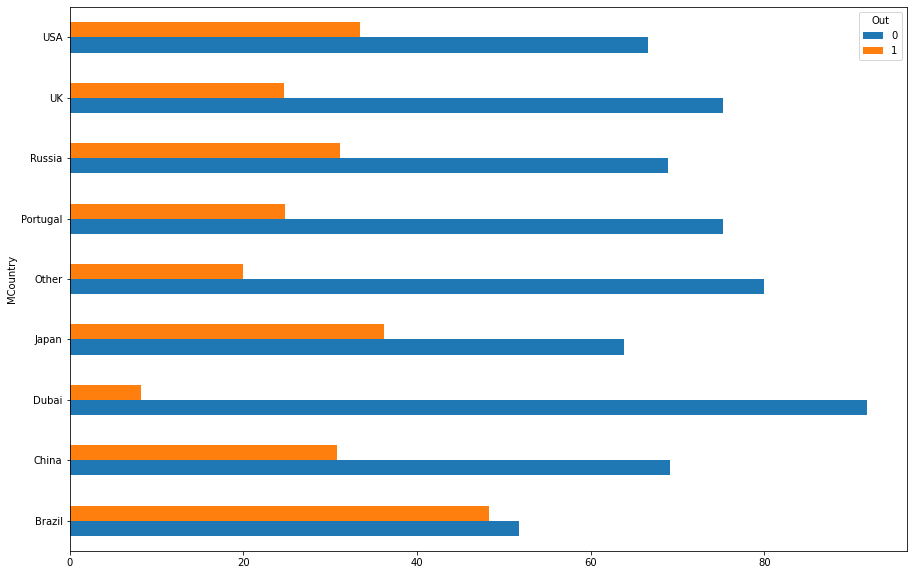

In [84]:
variables4 = ["OfficeLocation", "Country", "ModNationality", "MOfficeLocation", "MCountry"]
for var in variables4:
    predict = df.groupby(var)['Out'].value_counts(normalize = True).mul(100).round(1).unstack()
    print(predict)
    predict.plot.barh(
        figsize=(15,10)
    )
    plt.show()

---

**At this stage when we already understand the data better, discussed some conclusions and carryied out the transformations that we deemed necessary, we will now save our modified dataset and move on to the modeling phase, in a new notebook "Predict Talent Migration with Machine Learning - 02 Modelling"**

In [85]:
df.to_csv('projeto_final.csv', index=False)